# GUESS MY WEIGHT 

### Welcome to Guess My Weight!

Next Day Weight Loss Prediction Model. If you're looking to run in Google Colab. Please follow the [instructions](#google-colab) below. 

![guess_your_weight.gif](images/guess_your_weight.gif)

## Overview

Health and Wellness is a $142 billion dollar industry designed to help people managed their weight. This model is intended as a feature to guide users tracking lifestyle data (diet, exercise, sleep) with recommendations to target weight loss.  A machine learning Decision Tree algorithm analyzed captured lifestyle data with emphasis on precision and accuracy metrics. The model determined a Carbohydrate threshold, or Carb Number, which corresponded to next day weight loss or gain. At under 221g (for this user) nearly 74 percent of the next days weigh-in showed a loss. This increased to nearly 82 eprcent when acheiving a minimum fiber intake around 14.5 grams as well. Conversely, at over 221g, nearly 66 percent of the weigh-ins showed a gain. This increased to 79 percent when less than 6.9hrs of sleep was recorded in addition to the carb threshold. Based on these findings, it's recommended that these analytics be used to prompt/guide users through out the day to course correct on encourage certain habits. 

## Instructions for Google Colab
To run this notebook, you'll need a Kaggle log-in and web access to Google Colab. Google Colab is a free, user-friendly platform to run software, specifically data models. Kaggle is a website popular with data industry that hosts databases and runs data analytics competition. To access the database for this model, you will need to create a Kaggle account and follow the [instructions](https://www.kaggle.com/docs/api) to download your 'token' and 'key'. This model will prompt you to have that information. 

## Table of Contents TOC
[Business Case](#1.-business-case)<br />
[Data Understanding](#data-understanding)<br />
[Data Preparation](#data-preparation)<br />
[Modeling](#modeling)<br />
[Evaluation](#evaluation)<br />
[Github Repository and Resources](#github-repository-and-resources)<br />

## 1. Business Case

According to a CDC study, the obesity prevalence rate in the US was 42 percent in 2020. The Health and Wellness industry, valued at around $142 billion, has a plethora of systems, apps, and protocols to address this, yet it's still a problem. On a human level, we all know that managing our weight is both critical to health and happiness but also incredible challenging. The average person has dieted over 6 times in their life, according to a survey by the Mayo Clinic. There's a demand among users as well as a basic human earn to feel in control of our health. Creating additional, more intuitive tools to manage weight loss is a vast importance.

In this model, we focus on a small short term goals to determine if daily diet, exercise, and sleep goals can impact your weigh-in the next day. To simplify this task, we'll utilize binary prediction, either weight loss or weight gain, to determine if the sum of these daily habits to determine how they predicted this binary outcome. 

## 2. Data Understanding
### 2a. Data Source
The data source for this analysis is my personal health information. Over the course of 6 months, I lost approximately 20 lbs. Tracking my calories and weight was a big part of it, as well data captured from my devices (Iphone, Apple Watch). The dataset contains both the information that I logged (daily weigh-ins and food journaling) as well as workouts, heart rate, sleep, etc tracked passively. 

Quality Concerns
Because it’s my personal data there’s more clarity about data entry methods. This is more subjective, than a controlled experiment with many participants. I know what data I was diligent about collecting so I should be able to scrub it appropriately. For instance, I didn’t record my fluids consistently - water, tea, coffee. Water weight can be a big part of total weight, so the data is far from flawless.<br />

### 2b. Data Collection
#### Data Logging Protocol:
The protocol is as follows: A person (in this case, me, but anyone can follow) records their weight in the morning, tracks their data during the day, and wakes up the next day to record their sleep and weigh-in. The idea of a "day" with regard to activities ends the mornign log-in and starts with the first cup of water (usually right after). A day starts AFTER the morning weigh-in, even though it will be recorded on that day. 

#### Devices:
I have much (and probably too much) of this data in my iphone and Apple Watch. It contains the weight information, workouts, heart rate, meals - broken down into subcategories (proteins, fats, etc). Most importantly is the weight. That will be the feature that I primarily use for classification.  

#### Quality Concerns - Preliminary Note
Because it’s my data, there’s more clarity about how it was collected. This is more subjective, than say a controlled experiment with many participants. This data is considered found data, even though I was personally involved with the collection. I know the data I was focused on and which was ignored. For instance, I didn’t record my fluids consistently - water, tea, coffee. Water consumption is a big part of this so I’ll have to be clear about the gaps in the data.<br />

#### Data Extraction
Prior to a csv datafile accessible on Kaggle, the raw data files from the smartphone were preprocessed. They were stored on an xml file on a phone. That file was transferred to a local harddrive for further analysis. It was uploaded to a jupyter notebook where it was converted from a table of individual entries, to a table of daily sums. Data, as say a recurring pulse reading (any data in a unit/time for instance) where you could potentially extract data like daily averages, daily minimums and maximums were not converted into the clean dataset. Once the entire set had been converted to a daily sum over the approximate 6 months duration. It was uploaded to Kaggle for analysis. 
[return to TOC](#table-of-contents-TOC)

To begin our analysis, we start with the Kaggle download. Per Kaggle instructions above, you must have your Kaggle API Key and Token to work on this file.

#### Collect Data from Kaggle

In [1091]:
#install latest modules to facilitate Kaggle Download
#! pip install opendatasets
#! pip install kaggle

In [1092]:
#import standard python libraries and modules
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import opendatasets as od

#keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

#tensorflow
import tensorflow as tf

#sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree

#scipy
from scipy.stats import percentileofscore

#statsmodels for time response analysis
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [1093]:
#import libraries and prompts to access Kaggle API and download dataset. Add Kaggle API token and key hear
od.download("https://www.kaggle.com/datasets/andrewmbennett/guess-my-weight-4-25")

Skipping, found downloaded files in ".\guess-my-weight-4-25" (use force=True to force download)


We have successfully downloaded the data. We will now begin our data inspection

In [1094]:
df = pd.read_csv('/content/guess-my-weight-4-25/merge_health_4_25.csv')

In [1095]:
df

,date,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,...,DietaryZinc_mg,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs
0,2023-08-24,196.9,8895.0,4.163569,2055.322,564.7780,24.0,159.7455,11.8,9.5,...,0.5,9.0,0.3,1.1,1572.0,12.0,0.783333,5.558333,1.766667,0.266667
1,2023-08-25,195.1,9276.0,4.512434,2174.950,793.3800,7.0,62.9275,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,36.0,1.008333,3.700000,1.500000,0.133333
2,2023-08-26,195.1,10883.0,4.948209,2074.476,395.3870,9.0,118.3000,8.3,15.0,...,1.4,13.0,0.5,0.8,1943.0,8.0,1.400000,3.916667,1.558333,0.050000
3,2023-08-27,192.9,19174.0,9.909258,2187.383,895.4360,14.0,79.9300,3.1,2.9,...,1.5,18.0,0.3,0.5,1986.0,45.0,0.891667,5.566667,2.591667,0.066667
4,2023-08-28,192.9,13636.0,6.833914,2186.244,901.5490,21.0,70.8500,4.6,7.1,...,1.3,17.0,0.3,0.9,455.0,43.0,0.641667,5.275000,2.008333,0.158333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024-03-04,175.7,8191.0,4.051709,1983.933,499.0720,4.0,87.7000,7.9,9.9,...,2.8,58.0,0.3,2.8,1023.0,76.0,0.000000,0.000000,0.000000,0.000000
194,2024-03-05,174.2,8882.0,4.448750,2009.083,566.5723,9.0,88.6000,4.8,6.3,...,1.9,123.0,0.1,0.8,2387.0,135.0,0.816667,4.775000,1.858333,2.683333
195,2024-03-06,173.3,2610.0,1.272886,759.761,127.8580,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
196,2023-08-23,NaN,7325.0,3.399540,2057.531,476.7400,17.0,80.7000,1.8,0.9,...,0.5,2.0,0.2,0.5,422.0,10.0,0.983333,3.400000,1.091667,0.241667


### 2b. Data Description
From the description above, we have 198 rows, 46 columns, and data ranges from 2023-08-24 to 2024-03-06, with two extra rows at the rear.

#### Preliminary Inspection

In [1096]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          198 non-null    object 
 1   BodyMass_lb                   196 non-null    float64
 2   StepCount_count               197 non-null    float64
 3   DistanceWalkingRunning_mi     197 non-null    float64
 4   BasalEnergyBurned_Cal         197 non-null    float64
 5   ActiveEnergyBurned_Cal        197 non-null    float64
 6   FlightsClimbed_count          197 non-null    float64
 7   DietaryFatTotal_g             196 non-null    float64
 8   DietaryFatPolyunsaturated_g   196 non-null    float64
 9   DietaryFatMonounsaturated_g   196 non-null    float64
 10  DietaryFatSaturated_g         196 non-null    float64
 11  DietaryCholesterol_mg         196 non-null    float64
 12  DietarySodium_mg              196 non-null    float64
 13  Dieta

As we can see, the data is represented by the description of the variable and the unit. Our second variable (after data) is our critical label `BodyMass_lb` where `Body Mass` is the variable name and `lb` is the variable unit.

So we have all floats, except our data information, with the most of our entries with only one or two null entries. `DietaryBiotin_mcg` and `DietaryIodine_mcg` have 16-18 null entries. Because we have floats, we can do some preliminary inspection of the shape of the numbers.

In [1097]:
#show the numeric distribution of the numbers using the describe function
df.describe()

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietaryZinc_mg,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs
count,196.000000,197.000000,197.000000,197.000000,197.000000,197.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,127.684184,13800.162437,7.204382,2073.072868,766.412702,18.086294,67.874250,6.239286,11.020918,17.795782,...,2.898980,46.571429,0.436224,1.520408,1483.428571,40.609137,0.862986,4.171658,1.510068,0.251015
std,88.425096,5590.992597,3.323999,174.647851,266.738615,10.316307,42.134139,6.139551,10.304558,13.589299,...,2.923749,50.297168,0.378884,1.373669,1081.397548,36.563399,0.395328,1.826068,0.703816,0.467066
min,0.000000,2610.000000,1.272886,409.967000,17.642000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9770.000000,4.845659,2039.642000,581.163000,12.000000,47.175000,1.275000,1.275000,7.625000,...,0.500000,1.000000,0.100000,0.500000,487.750000,15.000000,0.733333,3.625000,1.341667,0.033333
50%,181.100000,12651.000000,6.202475,2096.636000,720.115000,16.000000,74.850000,4.650000,8.600000,17.550000,...,2.450000,27.000000,0.400000,1.200000,1566.500000,36.000000,0.958333,4.666667,1.683333,0.108333
75%,188.300000,16396.000000,9.263240,2137.858000,897.852000,22.000000,96.100000,9.300000,17.450000,26.325000,...,4.500000,78.000000,0.700000,2.400000,2214.500000,54.000000,1.108333,5.308333,1.950000,0.225000
max,388.500000,42434.000000,21.039808,2259.292000,1742.332000,97.000000,174.900000,28.900000,43.800000,75.300000,...,24.100000,192.000000,2.300000,6.100000,4564.000000,257.000000,1.525000,6.950000,2.633333,2.683333


Our first column, 'BodyMass_lb' appears to have both 0s for the minimum and 25 percentile. This is obviously not correct, and likely explains days where no weight was logged. THis is tricky - at least 25% of our critical data is missing. We also see 0s for `FlightsClimbed_count` which could be accurate, and for dietary data, like	`DietaryFatTotal_g`, which represents days where no dietary information was logged. We will have to address this in our data preparation.

#### Reset index column to dates
To continue, let's convert the date column to a datetime object and make it the index. We will also delete entries for Aug 22, and 23, as those dates appear on the fringe of our sample and have incomplete data.

In [1098]:
#convert the date
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [1099]:
# Make Date the index 
df.set_index('date', inplace=True)

In [1100]:
# delete the last row 
df.drop(['2023-08-22', '2023-08-23'], axis=0,inplace=True)

In [1101]:
df

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietaryZinc_mg,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,196.9,8895.0,4.163569,2055.322,564.7780,24.0,159.7455,11.8,9.5,36.2203,...,0.5,9.0,0.3,1.1,1572.0,12.0,0.783333,5.558333,1.766667,0.266667
2023-08-25,195.1,9276.0,4.512434,2174.950,793.3800,7.0,62.9275,0.0,0.0,10.8165,...,0.0,0.0,0.0,0.0,0.0,36.0,1.008333,3.700000,1.500000,0.133333
2023-08-26,195.1,10883.0,4.948209,2074.476,395.3870,9.0,118.3000,8.3,15.0,39.5000,...,1.4,13.0,0.5,0.8,1943.0,8.0,1.400000,3.916667,1.558333,0.050000
2023-08-27,192.9,19174.0,9.909258,2187.383,895.4360,14.0,79.9300,3.1,2.9,27.9600,...,1.5,18.0,0.3,0.5,1986.0,45.0,0.891667,5.566667,2.591667,0.066667
2023-08-28,192.9,13636.0,6.833914,2186.244,901.5490,21.0,70.8500,4.6,7.1,16.3000,...,1.3,17.0,0.3,0.9,455.0,43.0,0.641667,5.275000,2.008333,0.158333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-02,174.6,13416.0,6.533640,2048.925,1651.9890,16.0,76.2000,2.4,3.0,25.0000,...,1.1,24.0,0.3,1.4,1996.0,148.0,0.000000,0.000000,0.000000,0.000000
2024-03-03,175.0,15876.0,7.722016,2048.189,1443.2150,22.0,59.9000,1.3,0.6,9.7000,...,3.2,51.0,0.4,3.2,1987.0,173.0,1.108333,3.925000,1.966667,0.300000
2024-03-04,175.7,8191.0,4.051709,1983.933,499.0720,4.0,87.7000,7.9,9.9,25.9000,...,2.8,58.0,0.3,2.8,1023.0,76.0,0.000000,0.000000,0.000000,0.000000


Now that we have done preliminary data description, let's explore in detail.

### 2c. Data Exploration
Let's start with our most critical column, our target `BodyMass_lb`.

#### `BodyMass_lb` Inspection

In [1102]:
df['BodyMass_lb'].describe()

count    196.000000
mean     127.684184
std       88.425096
min        0.000000
25%        0.000000
50%      181.100000
75%      188.300000
max      388.500000
Name: BodyMass_lb, dtype: float64

As we mentioned, there seem to be considerable missing data. Also, the maximum says 388.5, which is clearly a mistake. Let's do a time plot to get a better sense of it.

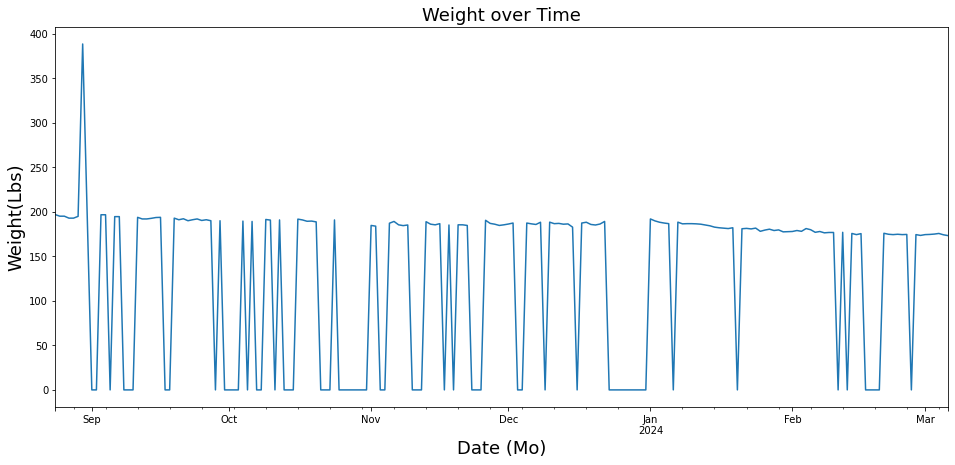

In [1103]:
#plot weigh-ins
df['BodyMass_lb'].plot(figsize = (16,7));
plt.xlabel('Date (Mo)')
plt.ylabel('Weight(Lbs)')
plt.title('Weight over Time')
plt.show()

So it appears as we suspected. There are considerable moments of missing data. I see the last week in December looks pretty bare. Let's see how many of these points are missing.

In [1104]:
#calculate ratio of null (or 0 wieghts)
null_weights = len(df[df['BodyMass_lb'] < 100])
total = len(df['BodyMass_lb'])
null_weights/total

0.3163265306122449

We have a few issues to resolve. 32% of the Body_Mass lbs are missing. Based on our knowledge of human weight fluctation, we know it's impossible to weight 0 pounds. More than likely, these are the dates when a wiegh-in was never performed. We should convert these values to NaN to make our graph appear better.

#### Sleep Inspection
Let's inspect the sleep column

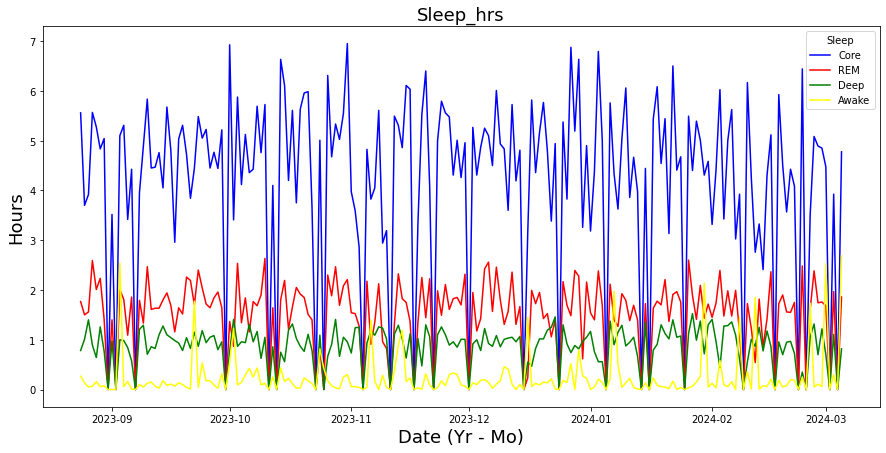

In [1105]:
#plot the relevant sleep categories
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['SleepAnalysis_AsleepCore_hrs'], color='blue', label = 'Core')
plt.plot(df['SleepAnalysis_AsleepREM_hrs'], color='red', label = 'REM')
plt.plot(df['SleepAnalysis_AsleepDeep_hrs'], color='green', label = 'Deep')
plt.plot(df['SleepAnalysis_Awake_hrs'], color='yellow', label = 'Awake')
 
plt.title('Sleep_hrs')
plt.xlabel('Date (Yr - Mo)')
plt.ylabel('Hours')
plt.legend(title = 'Sleep')
plt.show()

Much like the Body_Mass, we see considerable date with 0. However, the numbers appear relatively consistent, with Core average between 4-5hrs, REM under 2 hours, and Deep sleep around 1 hour.

#### Metabolism Inspection
Let's review the metabolism column. We'll limit this to only Basal and Active Energy for now. Basal, as Apple perceives it, is the same as your resting Calories. Active Calories, are those exercises done at a higher heart rate. While there's some medical disagreement about the difference between Basal and Resting Metabolism, for our purposes, we'll use Apple's definition. Basal/Resting Metabolism utilizes your weight, height, and age to factor this data. As I lost weight over time, there a slight trend in the downward direction

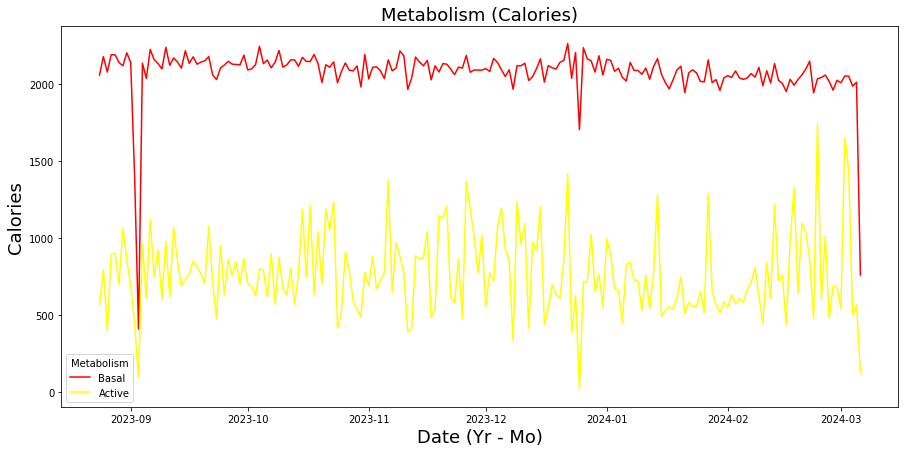

In [1106]:
#plot the data
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['BasalEnergyBurned_Cal'], color='red', label = 'Basal')
plt.plot(df['ActiveEnergyBurned_Cal'], color='yellow', label = 'Active')
 
plt.title('Metabolism (Calories)')
plt.xlabel('Date (Yr - Mo)')
plt.ylabel('Calories')
plt.legend(title = 'Metabolism')
plt.show()

Metabolism data looks consistent except for a few 0 entries, again, these are just days where the data wasn't captured. Most likely because devices weren't properly charged. This data is captured passively. 

#### Dietary Inspection
Now let's look at the diet information. For this, we'll focus on Carbohydrates and use a histogram.

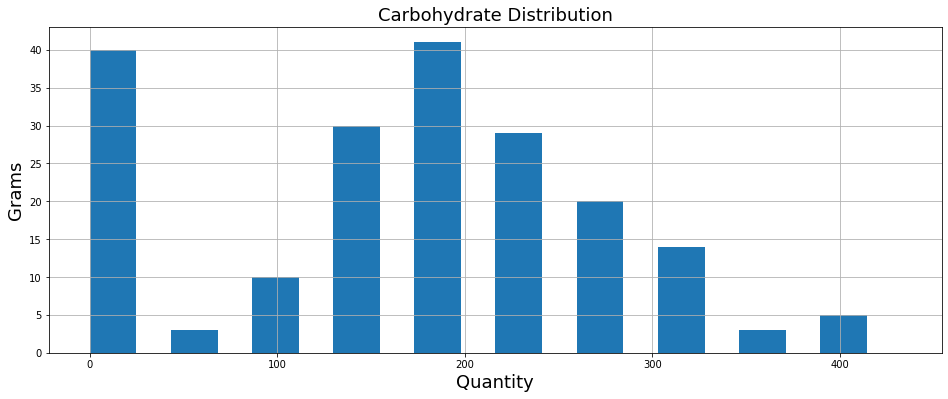

In [1107]:
df['DietaryCarbohydrates_g'].hist(figsize = (16,6), width = 25);

plt.title('Carbohydrate Distribution')
plt.xlabel('Quantity')
plt.ylabel('Grams')

plt.show()

Yes, again we have nearly 40 days where we didn't record Carbohydrate data.

In [1108]:
null_weights = len(df[df['DietaryCarbohydrates_g'] == 0])
total = len(df['DietaryCarbohydrates_g'])
null_weights/total

0.18877551020408162

19 percent missing data. This would correspond to other diet data as well, as the calories were entered by food item (ie Salmon Portion, Cheddar Rockets, etc.)

### 2d. Data Quality Assessment
The data contains numerous gaps which will have to be addressed to perform any analysis. Some of our most important columns, relying on manual entry, show over 31% and 19% for critical columns 'BodyMass_lb' and 'DietaryCarbohydrates_g' respectively.

Our 'BodyMass_lb' data is considered Missing Completely at Random (MCAR). This means that there's no pattern to the data gaps. It's totally random and independent of other variables. In this case, it's whenever I forgot to step on the scale and log my weight.

Regarding our Carbohydrate data, it is considered Missing at Random (MAR). We define these as data points that are missing, depending on observed values in other variables, but not on the missing values themselves. Meaning, because Carbohydrate data is missing, other Dietary data will be missing as well, so it's not completely random.

With the data that is apparent, it appears accurate and relevant and in the right format.

The passively (or automated) data tracking by my devices (sleep, metabolism) has fewer gaps.

## 3. Data Preparation
So we know we to address our missing columns. But we'll have to adjust our target column as well. Remember... we're looking to predict weight loss or weight gain. We'll have to do some feature engineering as well.

#### 3a. Data Selection
Our target data is Body_mass. Our feature data will be the data that pertains to metabolism or diet or sleep. The data will be segmented into those sections further in this section. First, let's fill in the missing data, which currently expresses as 0. The challenge here, is that the data point of 0.0 will affect our analysis, because it represents an actual number. 

For most of our feature data within each category, we can utilize the mean as an appopriate number. Take sleep (for instance), the data appears consistent over time and appears totally as noise. Same with dietary and metabolism data. Whether we sleep for 6 hours or 9 hours does not appear dependent on other data (outside of our sleep data). The same for our diet data - whether I have 200g of carbs one day or 300g the next day, it doesn't matter. It seems appropirate for this data that I use the mean.

Body Mass data is different. We know our weigh-in data is highly correlated to the previous days data - it's time dependent. So we'll need to do some brief analysis to verify that our data is in fact not totally correlated before we determine how to replace it.

#### 3b. Data Clean
#### Sleep
For sleep, we have a little more comfort converting this data to the mean for each sleep category, as we mentioned above.

In [1109]:
#create a sleep column
col_sleep = ['SleepAnalysis_AsleepDeep_hrs', 'SleepAnalysis_AsleepCore_hrs', 'SleepAnalysis_AsleepREM_hrs', 'SleepAnalysis_Awake_hrs']

In [1110]:
#if there are any null values, we will replace them and make them the mean
df[col_sleep] = df[col_sleep].fillna(df[col_sleep].mean())

In [1111]:
#replace each sleep column with a 0 to the mean of that column
df['SleepAnalysis_AsleepDeep_hrs'].replace(to_replace=0,value = df['SleepAnalysis_AsleepDeep_hrs'].mean(), inplace = True)
df['SleepAnalysis_AsleepCore_hrs'].replace(to_replace=0,value = df['SleepAnalysis_AsleepCore_hrs'].mean(), inplace = True)
df['SleepAnalysis_AsleepREM_hrs'].replace(to_replace=0,value = df['SleepAnalysis_AsleepREM_hrs'].mean(), inplace = True)
df['SleepAnalysis_Awake_hrs'].replace(to_replace=0,value = df['SleepAnalysis_Awake_hrs'].mean(), inplace = True)

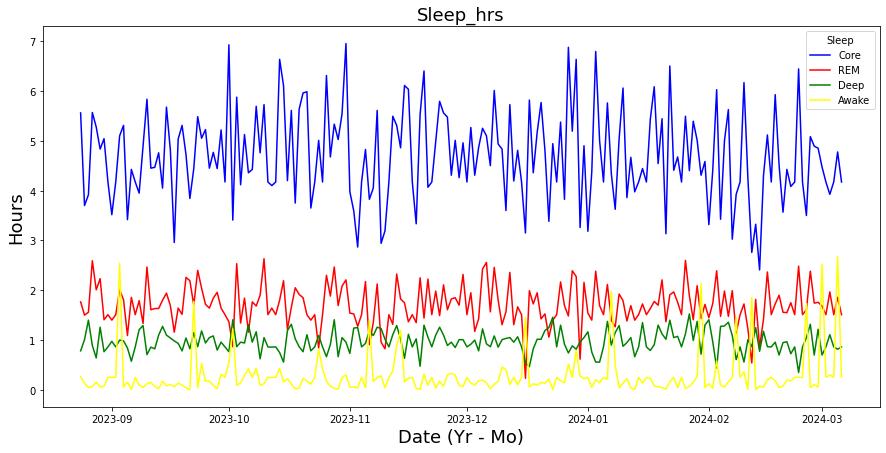

In [1112]:
#plot the relevant sleep categories
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['SleepAnalysis_AsleepCore_hrs'], color='blue', label = 'Core')
plt.plot(df['SleepAnalysis_AsleepREM_hrs'], color='red', label = 'REM')
plt.plot(df['SleepAnalysis_AsleepDeep_hrs'], color='green', label = 'Deep')
plt.plot(df['SleepAnalysis_Awake_hrs'], color='yellow', label = 'Awake')
 
plt.title('Sleep_hrs')
plt.xlabel('Date (Yr - Mo)')
plt.ylabel('Hours')
plt.legend(title = 'Sleep')
plt.show()

Looks much better. Making this data the mean doen't appear to have much impact, at least visually. Let's go to metabolism.
#### Metabolism
For metabolism, we have a little more comfort converting this data to the mean for each metabolism category. It's important to note that we have some exercise data as well. For the time being, we'll focus on metabolism. We feel comfortable replacing this data with the mean.

In [1113]:
col_exercise = ['StepCount_count', 'DistanceWalkingRunning_mi', 'BasalEnergyBurned_Cal', 'ActiveEnergyBurned_Cal', 'FlightsClimbed_count', 'AppleExerciseTime_min']
col_exercise = ['BasalEnergyBurned_Cal', 'ActiveEnergyBurned_Cal']

Let's take another quick inspection of the data.

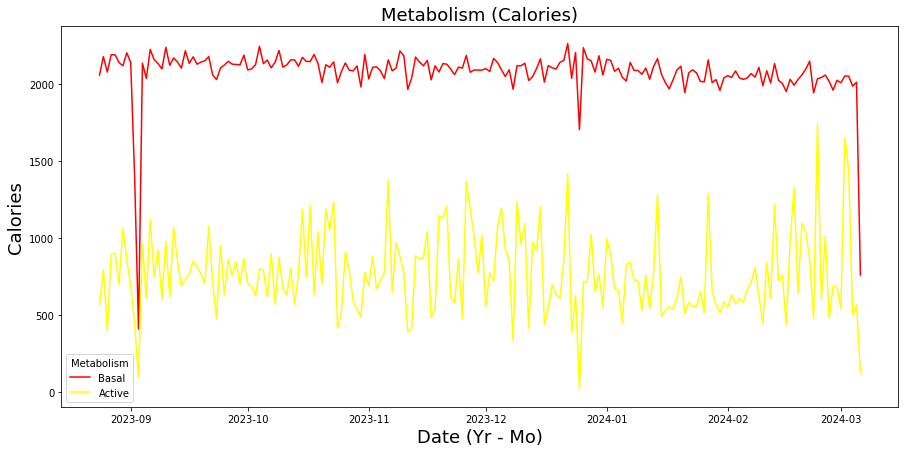

In [1114]:
#plot the data
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['BasalEnergyBurned_Cal'], color='red', label = 'Basal')
plt.plot(df['ActiveEnergyBurned_Cal'], color='yellow', label = 'Active')
 
plt.title('Metabolism (Calories)')
plt.xlabel('Date (Yr - Mo)')
plt.ylabel('Calories')
plt.legend(title = 'Metabolism')
plt.show()

Here was can see that our data is never actually 0, but certain drop-off looks suspicious. It looks as though moments where Basal Metabolism falls below 1750 calories (or so) represents faulty data. Same for Active Energy below 250 calories.

In [1115]:
#let's convert those low values to mean
df.loc[df['ActiveEnergyBurned_Cal'] < 250, 'ActiveEnergyBurned_Cal'] = df['ActiveEnergyBurned_Cal'].mean()
df.loc[df['BasalEnergyBurned_Cal'] < 1750, 'BasalEnergyBurned_Cal'] = df['BasalEnergyBurned_Cal'].mean()

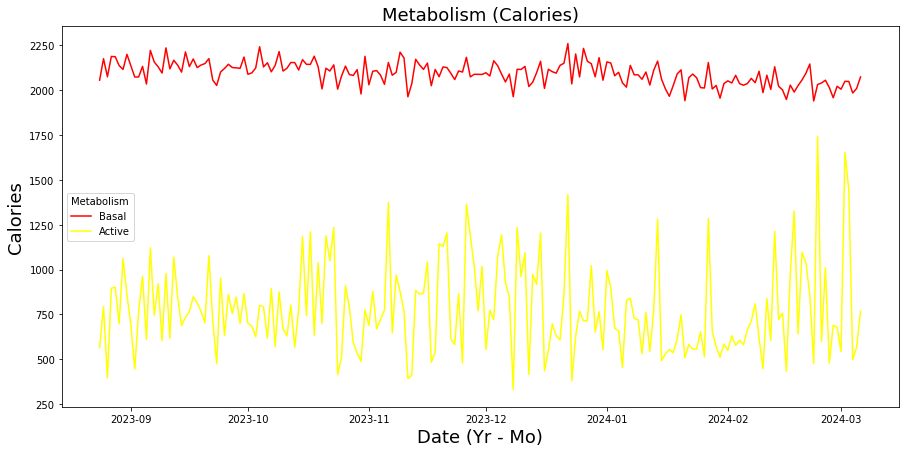

In [1116]:
#plot the data
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['BasalEnergyBurned_Cal'], color='red', label = 'Basal')
plt.plot(df['ActiveEnergyBurned_Cal'], color='yellow', label = 'Active')
 
plt.title('Metabolism (Calories)')
plt.xlabel('Date (Yr - Mo)')
plt.ylabel('Calories')
plt.legend(title = 'Metabolism')
plt.show()

This looks better. Let's move on to Dietary. 
#### Dietary
For dietary concerns, we can still convert this data to the mean for each feature, including all of the small micronutrients. The challenge here is not only the 0 data, but also data that looks exceptionally small. Recall that the dietary information comes from manually logging food data. Were meals skipped? Snacks missed? Sure. The trick is determining how many of those meals were incomplete and how many were just low consumption days. 

First, let's recall our carbohydrate histogram

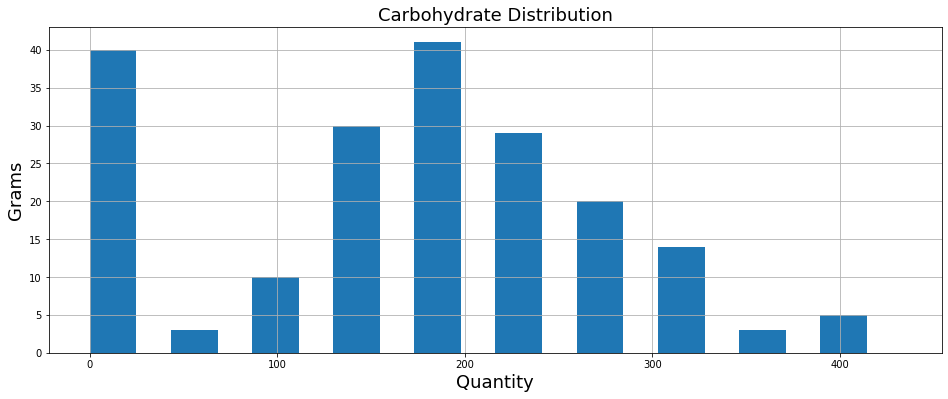

In [1117]:
df['DietaryCarbohydrates_g'].hist(figsize = (16,6), width = 25);

plt.title('Carbohydrate Distribution')
plt.xlabel('Quantity')
plt.ylabel('Grams')

plt.show()

As we can see here, there are considerable 0 days. And also, as we mentioned above, a few days where the carbs appear less than 75 grams.

Let's plot all the Carbs, Proteins, and Fats together to see if our theory's accurate. Namely, that low Carbohydrate days correspond to low dietary days all around.

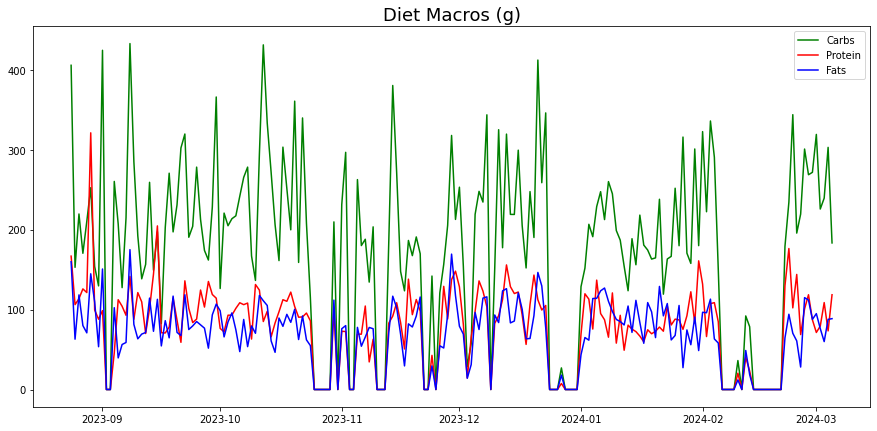

In [1118]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['DietaryCarbohydrates_g'], color='green', label = 'Carbs')
plt.plot(df['DietaryProtein_g'], color='red', label = 'Protein')
plt.plot(df['DietaryFatTotal_g'], color='blue', label = 'Fats')
 
plt.title('Diet Macros (g)')
plt.legend()
plt.show()

Yes. It looks as though it's consistent across the board. We need to convert these areas (under 75 grams) to mean across all of the Dietary information.

In [1119]:
#we'll go ahead and convert all dietary data to Nan where the Carbs are less than 75g
col_dietary = [col for col in df.columns if "Dietary" in col]
df.loc[df['DietaryCarbohydrates_g'] < 75.0, col_dietary] = np.nan

In [1120]:
df[col_dietary] = df[col_dietary].fillna(df[col_dietary].mean())

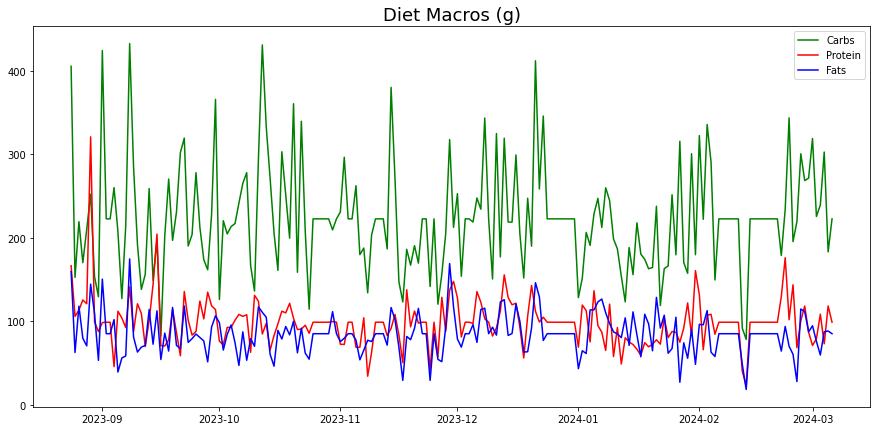

In [1121]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['DietaryCarbohydrates_g'], color='green', label = 'Carbs')
plt.plot(df['DietaryProtein_g'], color='red', label = 'Protein')
plt.plot(df['DietaryFatTotal_g'], color='blue', label = 'Fats')
 
plt.title('Diet Macros (g)')
plt.legend()
plt.show()

This data looks better. Even though it's not perfect. There are still a few dips but better.

#### Body Mass
As we mentioned previously, Body Mass is a partially time dependent feature. We can not simply impute the mean, because we know the value is affected by the previous days number. So let's look at our mass again and sort through it.

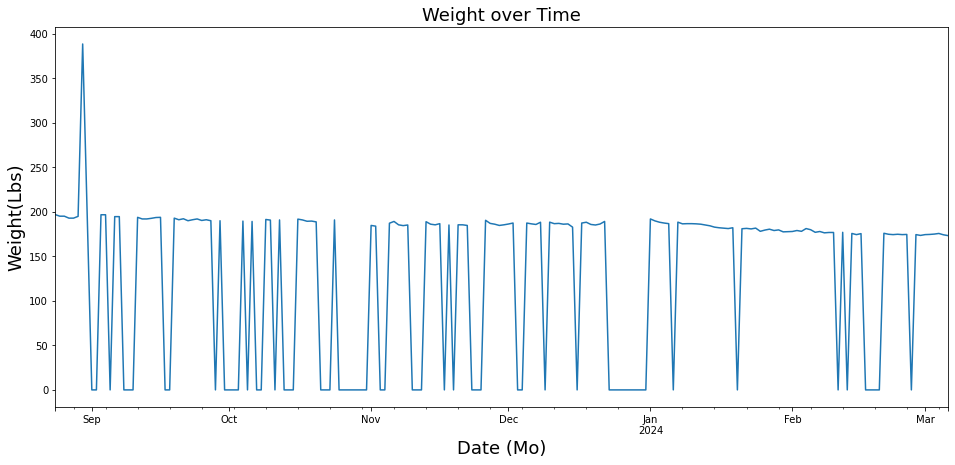

In [1122]:
df['BodyMass_lb'].plot(figsize = (16,7));
plt.xlabel('Date (Mo)')
plt.ylabel('Weight(Lbs)')
plt.title('Weight over Time')
plt.show()

As we mentioned, we can not feasibly have 0.0s in our weight column, so let's convert those to Nans.

In [1123]:
df.loc[df['BodyMass_lb'] == 0.0,'BodyMass_lb'] = np.nan

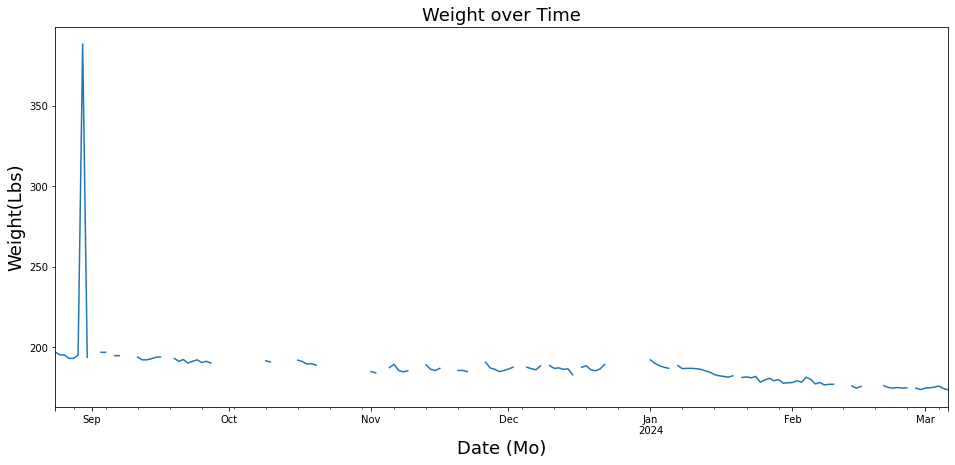

In [1124]:
df['BodyMass_lb'].plot(figsize = (16,7));
plt.xlabel('Date (Mo)')
plt.ylabel('Weight(Lbs)')
plt.title('Weight over Time')
plt.show()

Our weights appear better, except for one errant reading. We know that 388.5 is not possible. So we'll go ahead and make that null as well.

In [1125]:
df.loc[df['BodyMass_lb'] == 388.5,'BodyMass_lb'] = np.nan

Now, let's plot the graph

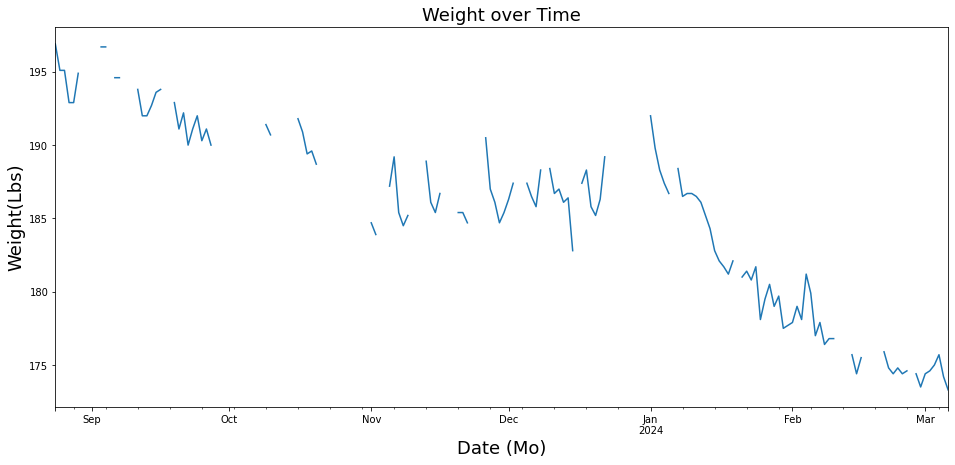

In [1126]:
df['BodyMass_lb'].plot(figsize = (16,7));
plt.xlabel('Date (Mo)')
plt.ylabel('Weight(Lbs)')
plt.title('Weight over Time')
plt.show()

So, as we've established, we can't impute the mean for this. Instead we can try to interpolate the results and evaluate whether this is reasonable. The interpolation takes the two known points on either sife of missing data and attempts to find points in between. We'll use the `spline` option in the iterpolate capabilities of the dataframe. `spline` attempts to smooth out the data.

In [1127]:
#create new column for interpolated data
df['BodyMass_lb_inter'] = df['BodyMass_lb'].interpolate(option='spline')

In [1128]:
#let's inspect the results
df.head(5)

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs,BodyMass_lb_inter
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,196.9,8895.0,4.163569,2055.322,564.778,24.0,159.7455,11.8,9.5,36.2203,...,9.0,0.3,1.1,1572.0,12.0,0.783333,5.558333,1.766667,0.266667,196.9
2023-08-25,195.1,9276.0,4.512434,2174.950,793.380,7.0,62.9275,0.0,0.0,10.8165,...,0.0,0.0,0.0,0.0,36.0,1.008333,3.700000,1.500000,0.133333,195.1
2023-08-26,195.1,10883.0,4.948209,2074.476,395.387,9.0,118.3000,8.3,15.0,39.5000,...,13.0,0.5,0.8,1943.0,8.0,1.400000,3.916667,1.558333,0.050000,195.1
2023-08-27,192.9,19174.0,9.909258,2187.383,895.436,14.0,79.9300,3.1,2.9,27.9600,...,18.0,0.3,0.5,1986.0,45.0,0.891667,5.566667,2.591667,0.066667,192.9
2023-08-28,192.9,13636.0,6.833914,2186.244,901.549,21.0,70.8500,4.6,7.1,16.3000,...,17.0,0.3,0.9,455.0,43.0,0.641667,5.275000,2.008333,0.158333,192.9


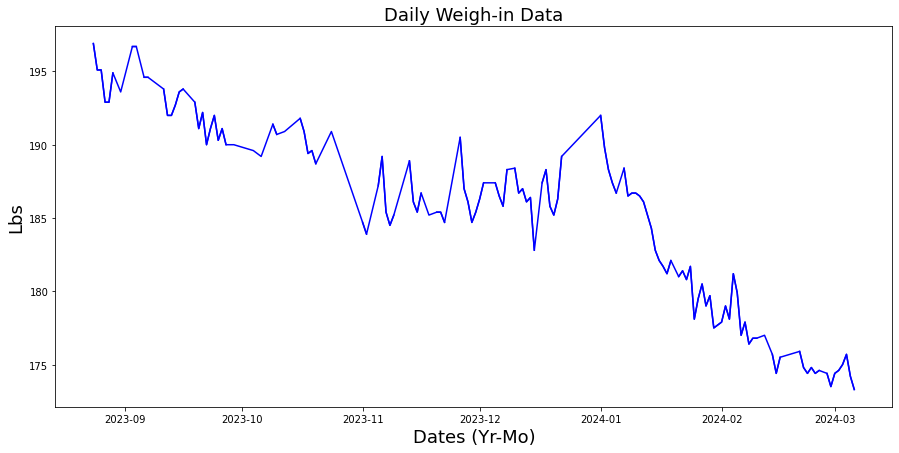

In [1129]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['BodyMass_lb_inter'], color='blue', label = 'Interpolated_Data')
plt.plot(df['BodyMass_lb'], color='blue', label = 'Actual')

#plt.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b"))

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('axes', titlesize=SMALL_SIZE, labelsize=MEDIUM_SIZE)

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#matplotlib.rc('font', size=BIGGER_SIZE)
#matplotlib.rc('axes', titlesize=BIGGER_SIZE)

plt.title('Daily Weigh-in Data')
plt.xlabel('Dates (Yr-Mo)')
plt.ylabel('Lbs')
#plt.legend()
plt.show()

This looks good, we can move on to the next task.

Recall our protocol from above: 
The idea of a "day" with regard to activities ends the mornign log-in and starts with the first cup of water (usually right after). A day starts AFTER the morning weigh-in, even though it will be recorded on that day.

Our data as it's listed there lists the morning weigh-in as if it's a result of the food we're eating AFTER we weighed in. To rectify this, we have to adjust our weight data "up" by a day. Meaning, if we have a weigh-in on Sept. 8, it really reflects the food, sleep, and metabolism, from the night before.

Let's go ahead and adjust this data by a day

In [1130]:
#initialize a blank series series without the date index
series = df['BodyMass_lb_inter'].reset_index()

#loop through series and move the interpolated weight one index (data) up
for ind in range(0,len(series)-1):
    series.loc[ind, 'BodyMass_lb_inter'] = series.loc[ind+1, 'BodyMass_lb_inter']

#make the last value Nan    
series.loc[ind+1, 'BodyMass_lb_inter'] = np.NaN

#re-stablish date index
series.set_index('date', inplace = True)

#create new feature in df to represent the new lagged body mass
df['BodyMass_lb_inter'] = series['BodyMass_lb_inter']

okay, let's see how it looks

In [1131]:
df[['BodyMass_lb', 'BodyMass_lb_inter']].head(5)

,BodyMass_lb,BodyMass_lb_inter
date,,
2023-08-24,196.9,195.1
2023-08-25,195.1,195.1
2023-08-26,195.1,192.9
2023-08-27,192.9,192.9
2023-08-28,192.9,194.9


Okay, so we've got interpolated weight data that we feel comfortable with.

#### Checking Weight Difference - Time Dependency
The main feature we have to create is our weight loss column. Recall that our goal is to predict weight_loss or weight_gain. TO do this, we have to create a column with the weight difference. We also use this column to test for stationality, just to make sure our time dependent target appears as noise.

In [1132]:
#let's create the weight difference in a new column
df.loc[:,'BodyMass_lb_diff'] = df.loc[:,'BodyMass_lb_inter'].diff().tolist()

In [1133]:
#review column
df['BodyMass_lb_diff'].head(5)

date
2023-08-24    NaN
2023-08-25    0.0
2023-08-26   -2.2
2023-08-27    0.0
2023-08-28    2.0
Name: BodyMass_lb_diff, dtype: float64

Here, we can replace the first Nan with the actual value (from our original BodyMass_lb column) 

In [1134]:
#provide the first differenced entry
df.iloc[0,len(df.columns)-1] = df.iloc[0,len(df.columns)-2] - df.iloc[0,0]

In [1135]:
#let's review the last columns
df['BodyMass_lb_diff'].tail(5)

date
2024-03-02    0.4
2024-03-03    0.7
2024-03-04   -1.5
2024-03-05   -0.9
2024-03-06    NaN
Name: BodyMass_lb_diff, dtype: float64

the Nan here on the last column is expected. We don't have the data from March 7th. So this is normal.

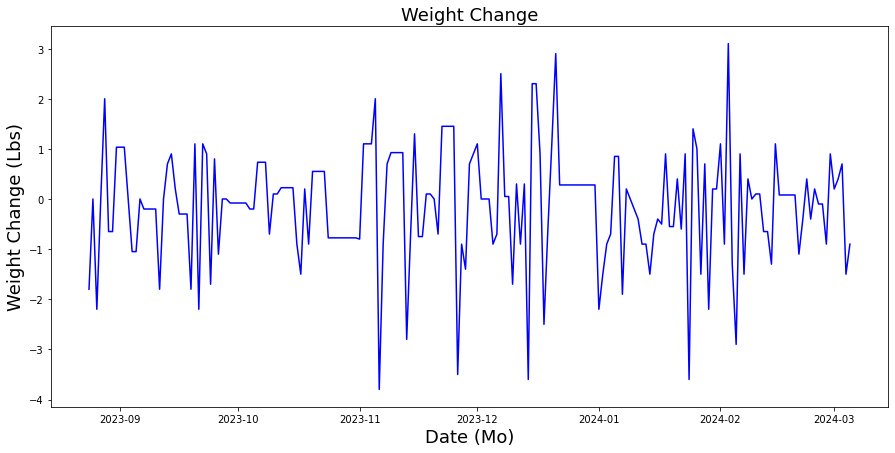

In [1136]:
#Let's plot the results
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['BodyMass_lb_diff'], color='blue', label = 'Weight Diff')

plt.title('Weight Change')
plt.xlabel('Date (Mo)')
plt.ylabel('Weight Change (Lbs)')
plt.show()

Now that we have differenced the data, and have nothing null, let's go ahead and test for Dickey-Fuller

#### Test for Stationality
The Dickey-Fuller Test shows if we have Stationality. We're going to use the Dickey-Fuller test in the stats model. This function does not permit null values. So let's see how we're doing. We'll create a new dataframe to test. 

In [1137]:
#drop null values
new_df = df.dropna(subset=['BodyMass_lb_diff'])

In [1138]:
dftest = adfuller(new_df['BodyMass_lb_diff'])

In [1139]:
# Print Dickey-Fuller test results
print('Results of Dickey-Fuller Test: \n')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                -9.581410e+00
p-value                        2.153488e-16
#Lags Used                     3.000000e+00
Number of Observations Used    1.910000e+02
Critical Value (1%)           -3.465059e+00
Critical Value (5%)           -2.876794e+00
Critical Value (10%)          -2.574901e+00
dtype: float64


Fantastic, we have a low P-Value. So, we've confirmed our weight data can be considered noise, even though we did have a slight trend of weight loss over time. We don't need any decomposition before we begin our analysis.

#### Autocorrelation Checks
Let's check autocorrelation to make sure there's no additional time dependency

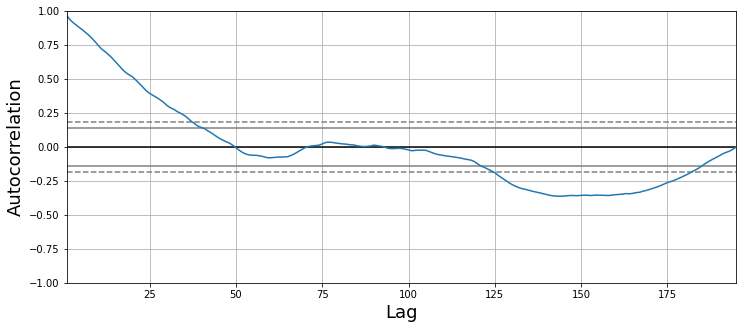

In [1140]:
#plot autocorrelation
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(new_df['BodyMass_lb_inter']);

This is what we would expect, essentially a declining correlation over time. What we weigh each day has a declining reliance on the previous day. Let's check the Partial Autocorrelation.

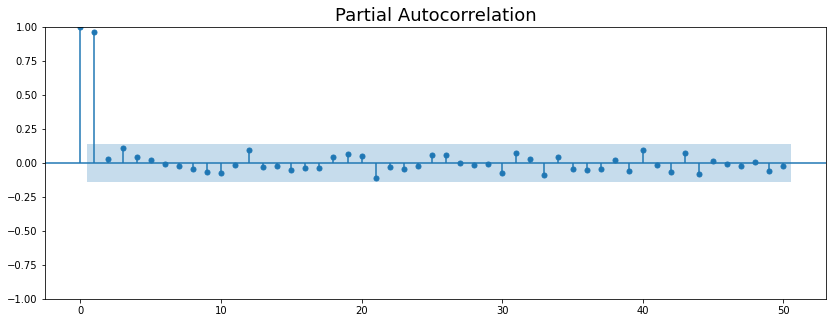

In [1141]:
#plot PACF
rcParams['figure.figsize'] = 14, 5

plot_pacf(new_df['BodyMass_lb_inter'], lags=50);

Both plots look pretty stationary. So that's great. Our PACF plot shows high correlation with the 1st order, which is exactly what we would expect. The difference in what we weigh from one day to the next is what we care about.

Let's go ahead and start Feature Engineering

### 3.c Feature Engineering
So, now that we added have scrubbed our data, interpolated the weight loss, and verified no difference beyond our previous day weight loss, we can dig into the feature engineering.

#### Weight Loss column
Let's create a new weight loss column that we will use as our target variable for the classification models.

In [1142]:
#let's rename original Body Mass data and call it raw 
df.loc[:,'BodyMass_lb_raw'] = df.loc[:,'BodyMass_lb']

Let's also drop our Nans on the last row of our differenced column (recall, we only did this for our new_df)

In [1143]:
#drop NAs from the last row
df.dropna(subset=['BodyMass_lb_diff'],inplace=True)

Let's make our category to determine if weight loss occurred. This is relatively simple. Let's call it weight loss, and we'll give it a 1, if there's was weight loss, and 0 if there wasn't. In this scenario, even 0 lbs would be the same as weight gain.

In [1144]:
df.loc[:,'weight_loss'] = (df['BodyMass_lb_diff']<.01).astype(int).tolist()

Now that we have a new weight loss column, we can track the weight by weight loss days, and not a time dependent variable. Let's show a new graph to detail this.

In [1145]:
#create wieght days dataframe for plotting
weight_days = pd.DataFrame(df[df['weight_loss'] == 1]['weight_loss'].resample('M').count())
weight_days['weight_gain'] = df[df['weight_loss'] == 0]['weight_loss'].resample('M').count()
weight_days.reset_index(inplace = True)
weight_days['date'] = weight_days['date'].dt.month_name().str[:3]
weight_days.set_index('date', inplace = True)

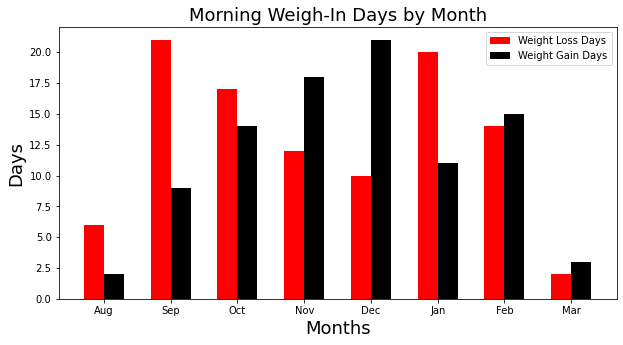

In [1146]:
# Specify the values of black bars (height)
weight_gain = weight_days['weight_gain']

# Specify the values of red bars (height)
weight_loss = weight_days['weight_loss']

# Position of bars on x-axis
ind = np.arange(len(weight_days['weight_gain']))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, weight_loss, width, label='Weight Loss Days', color = 'red')
plt.bar(ind + width, weight_gain, width, label='Weight Gain Days', color = 'black')

plt.xlabel('Months')
plt.ylabel('Days')
plt.title('Morning Weigh-In Days by Month')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width/2, weight_days.index)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [1147]:
#let's see the total
weight_days.loc['totals'] = [weight_days['weight_loss'].sum(), weight_days['weight_gain'].sum()]
weight_days

,weight_loss,weight_gain
date,,
Aug,6,2
Sep,21,9
Oct,17,14
Nov,12,18
Dec,10,21
Jan,20,11
Feb,14,15
Mar,2,3
totals,102,93


### 3d. PCA Analysis
Now that we have all of these feature variables, and we believe we're in good shape. Let's figure out if there's any PCA or correlation issues with our data. To do that, we'll separate between what the potential targets are from the features.

In [1148]:
targets = df.loc[:,'BodyMass_lb_inter':'weight_loss']
features = df.loc[:,'StepCount_count':'SleepAnalysis_Awake_hrs']

Now that we've done that, let's review the correlation of the features via a heatmap. We will utilize the heatmap function. We'll use the standardization of the data here.

In [1149]:
#scale the date
scaler_std = StandardScaler() 
features_std = pd.DataFrame(scaler_std.fit_transform(features), columns = features.columns)

<Axes: >

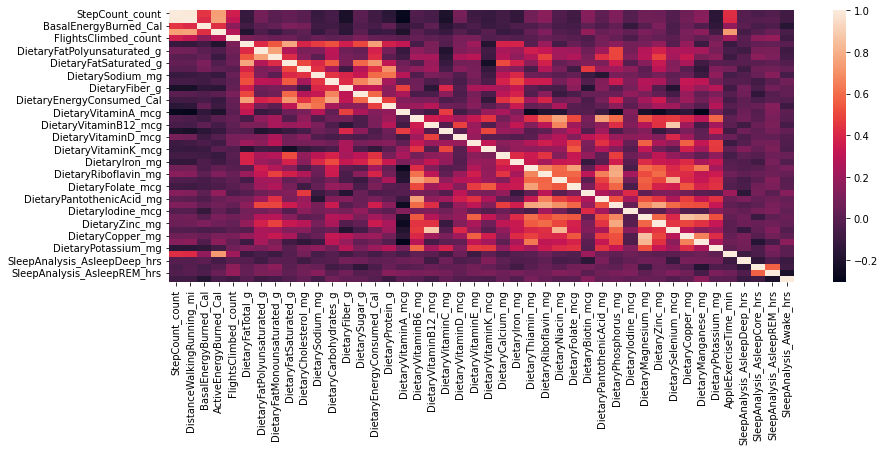

In [1150]:
# Your code here
sns.heatmap(features_std.corr())

There appears to be significant correlation here, especially among the micronutrients. Let's do a quick PCA analysis to understand the variance.

In [1151]:
#PCA analysis to locate possible variance reduction
pca_1 = PCA(n_components=12)
pca_2 = PCA(n_components=24)
pca_3 = PCA(n_components=36)

principalComponents = pca_1.fit_transform(features_std)
principalComponents = pca_2.fit_transform(features_std)
principalComponents = pca_3.fit_transform(features_std)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))


0.7718141093403271
0.9424805670117007
0.9928075952307179


Wow, okay, so we can maintain about 80% of our data through 12 components, down from 45. That's an improvement, but still suggests a lot of variation in the data. At the same time, a lot of correlation (the heat in our correlation map). It's probably a good time to delve into the data a bit more. Previously, we divided our data into dietary, exercise, and sleep. It turns out, we may need to create further subsets through segmenting. 

### 3e. SEGMENTING FEATURE DATA
In order to better sort all of the correlation here, it might be a good time to segment the data. To do this, we'll utilize a heirarchal arrangement of data points.

![data_heirarchy](images/data_heirarchy.png)

For dietary information, it's useful to think of it in levels. It starts with Level 1 - `DietaryEnergyConsumed_Cal`, from there we go to Level 2 - macronutrients  `DietaryFatTotals_g`, `DietaryCarbohydrates_g`, `DietaryProtein_g`. But fortunately for us, we have, what I call, Level 3 - sub-macronutrients still measured in grams, which includes things like `DietarySugar_g` which is a carbohydrate, and `DietarySaturatedFats_g` which is a fat. Going further, we have micronutrients, or Level 4 - measured in milligrams (or even micrograms) of things like `DietarySodium_mg` and `DietaryCholesterol_mg`.

Same with sleep. With sleep, we have level 2 data - REM, Core, Deep. We also have awake hours as well. Level 1 data, if we wanted it, would consist of the total hours of sleep we got. So, if we chose to include only Level 1 diet data in our analysis, it might be better to be consistent with sleep as well. Same with exercise. We have basal and active calories, or Level 2, and we have exercise minutes. Exercise minutes are even a collary category of workout. 

There's a big correlative overlap between Level 1, 2, & 3. So, we have to make a decision on what we want to include. Given where we are, let's start with Level 1 and go from there.

To do that, let's start with Level 1. For sleep and metabolism, we'll have to feature engineer our total numbers (sleep hours and metabolic calories burned).

#### Level 1 - Correlation Check

In [1152]:
df.loc[:,'SleepAnalysis_AsleepTotal_hrs'] = df.loc[:,'SleepAnalysis_AsleepDeep_hrs'] + df.loc[:,'SleepAnalysis_AsleepCore_hrs'] + df.loc[:,'SleepAnalysis_AsleepREM_hrs']
df.loc[:,'TotalEnergyBurned_Cal'] = df.loc[:,'BasalEnergyBurned_Cal'] + df.loc[:,'ActiveEnergyBurned_Cal']

In [1153]:
#combine all 3 - Level 1 
level_1 = ['DietaryEnergyConsumed_Cal', 'TotalEnergyBurned_Cal', 'SleepAnalysis_AsleepTotal_hrs']
level_1_diet = ['DietaryEnergyConsumed_Cal']
level_1_exer = ['TotalEnergyBurned_Cal']
level_1_sleep = ['SleepAnalysis_AsleepTotal_hrs']

feature_1 = df[level_1]

<Axes: >

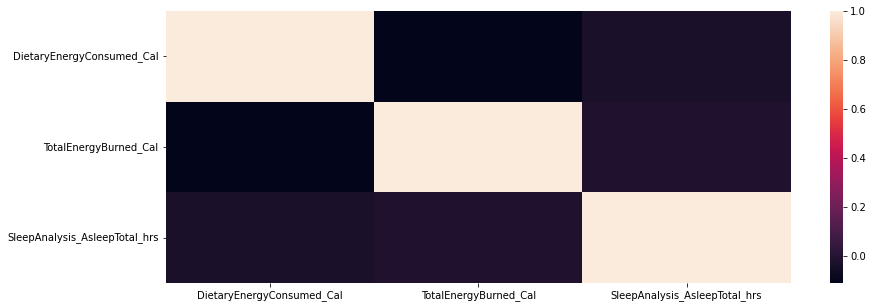

In [1154]:
#let's check our heatmap
sns.heatmap(feature_1.corr())

aha, so very little correlation between dietary energy, total energy, and sleep analysis. Now, let's run some models on our data and see which performs the best. Because we're worried about whether we've gained weight or lost weight, accuracy is going to be or relevant prediction.

#### Level 2 - Correlation Check

In [1155]:
#combine - Level 2
level_2_diet = ['DietaryFatTotal_g', 'DietaryProtein_g', 'DietaryCarbohydrates_g']
level_2_exer = ['BasalEnergyBurned_Cal','ActiveEnergyBurned_Cal']
level_2_sleep = ['SleepAnalysis_AsleepDeep_hrs','SleepAnalysis_AsleepCore_hrs','SleepAnalysis_AsleepREM_hrs', 'SleepAnalysis_Awake_hrs']
level_2 = level_2_diet + level_2_exer + level_2_sleep
feature_2 = df[level_2]

<Axes: >

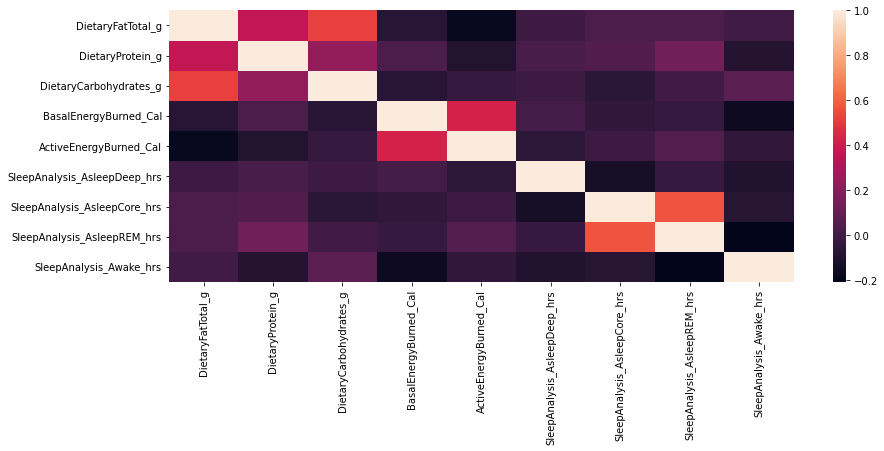

In [1156]:
sns.heatmap(feature_2.corr())

There is some correlation above espeicially between `DietaryFatTotal_g` and `DietaryCarbohydrates_g`, as well `DietaryFatTotal_g` and `DietaryProtein_g`. Also some between Sleep variables.

#### Level 3 - Correlation Check

In [1157]:
#feature engineering - let's create some of the categories for dietary 3, will start with Residual Carbs
carb_series = df.loc[:,'DietaryCarbohydrates_g'] - df.loc[:,'DietarySugar_g'] - df.loc[:,'DietaryFiber_g'] 
df.loc[:,'DietaryCarbsResidual_g'] = carb_series

#let's create some of the categories for dietary 3, will start with Residual Fats
fat_series = df.loc[:,'DietaryFatTotal_g'] - df.loc[:,'DietaryFatMonounsaturated_g'] -  df.loc[:,'DietaryFatPolyunsaturated_g'] - df.loc[:,'DietaryFatSaturated_g'] 
df.loc[:,'DietaryFatsResidual_g'] = fat_series
    
#let's aggregate the level 3 dietary information
level_3_diet_carbs = ['DietaryCarbsResidual_g', 'DietarySugar_g', 'DietaryFiber_g']
level_3_diet_fat = ['DietaryFatsResidual_g', 'DietaryFatMonounsaturated_g', 'DietaryFatPolyunsaturated_g', 'DietaryFatSaturated_g']
level_3_diet_protein = ['DietaryProtein_g']
level_3_diet = level_3_diet_carbs + level_3_diet_fat + level_3_diet_protein

#our exercise categories have both stepCount and DistanceWalking, we'll get rid of StepCount
level_3_exer = ['DistanceWalkingRunning_mi', 'FlightsClimbed_count', 'AppleExerciseTime_min']

#combine - Level 3, please note, there is no level 3 for sleep and exercise, we will reuse level 2 info there
level_3 = level_3_diet + level_3_exer + level_2_sleep
feature_3 = df[level_3]

<Axes: >

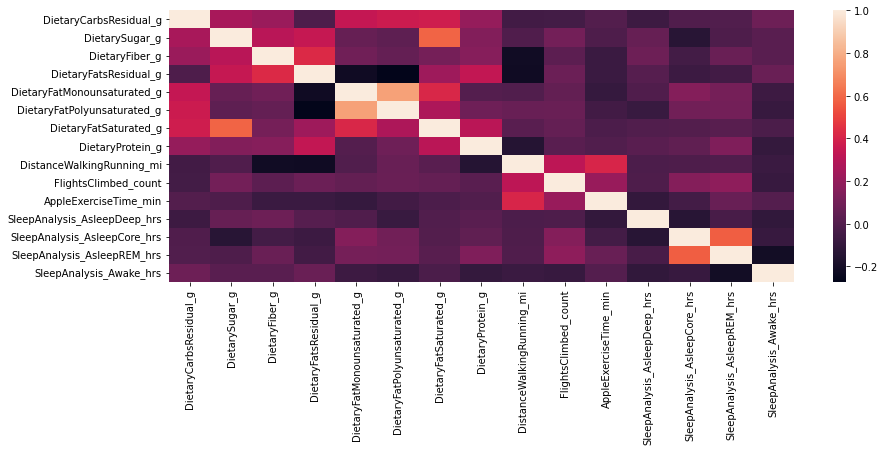

In [1158]:
sns.heatmap(feature_3.corr())

We see some correlation between sleep, as well as a bit of correlation between the sub-macronutrients of both Carbs and Fats. Despite some correlation here, we've significantly cut down on both the overall correlation we saw with all of our variables. We will leave out our Micronutrients for now.

### 3f. Data Preparation Summary
We have successfuly completed our Data Preparation. We filled in the missing values, we feature engineered a few target categories. We also verified that our data was stationary and that there were no correlations in our time dependent weight loss category. Furthermore, we analyzed the data to check for variance and correlation and were able to segment our data into smaller, more manageable segments. We are ready to model!

### 4. Modeling
In order to select the best model, we will use a variety of traditional algorithms and use our different feature segments (level 1, level 2, and level 3). We'll start with KNN, Logistic Regression, Decision Tree, Naive Bayes, SVM, and Neural Network. Evaluation metrics will be tallied in one table and then we will select on optimal model based on the evaluation metrics. Each model will get a set of trianing data and a set of test for which to report. We will try to optimize hyperparameters when available.

### 4.1 Level 1 Modeling

#### Baseline Random Algorithm
Prior to that, let's perform a very simple, random test, to randomly select whether an observation is a weight loss day or a weight gain day.

In [1159]:
#initialize baseline dataframe from the weight loss column
baseline = pd.DataFrame(df['weight_loss'])

#create a predictions column that randomly chooses 0 or 1
baseline['Predictions'] = [random.randrange(0, 2, 1) for i in range(len(baseline['weight_loss']))]

#create another column which determines which are correct
baseline['Correct?'] = (baseline['weight_loss'] == baseline['Predictions'])

#count the true and false answers
baseline['Correct?'].value_counts(normalize=True)

Correct?
False    0.574359
True     0.425641
Name: proportion, dtype: float64

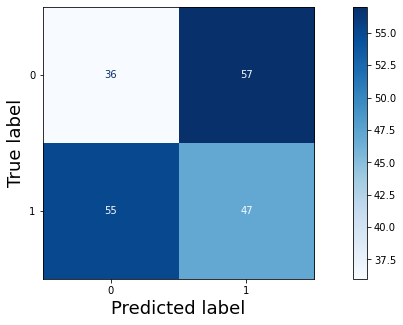

In [1160]:

target = baseline['weight_loss']
preds = baseline['Predictions']

cnf = confusion_matrix(target, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf)
disp.plot(cmap=plt.cm.Blues)

This make sense, as we have a 50-50 model (basically) with skew towards predicting weight loss (Label = 1). Recall that we have more weight loss days than weight gain days. Let's see how this compares with our evaluation metrics.

In [1161]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(target, preds)

Precision Score: 0.4519230769230769
Recall Score: 0.46078431372549017
Accuracy Score: 0.4256410256410256
F1 Score: 0.45631067961165045


So, we have what we thought... a roughly 50-50 model which skews higher in precision because we have more weight loss days. Make sense. Let's create a dataframe, called level 1, which puts our results in one table for comparison.

In [1162]:
level_1_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'Accuracy', 'F1', 'Cross-Val-Acc'])
level_1_df.loc[0] = ['Baseline - Random',
                  precision_score(target, preds), 
                  recall_score(target, preds), 
                  accuracy_score(target, preds), 
                  f1_score(target, preds),
                  'N/A']
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.451923,0.460784,0.425641,0.456311,N/A


okay, now let's go ahead and create something for each algorithm.

#### Standard Imports and Custom Scoring Functions for each algorithm

In [1163]:
# Import train_test_split 


# Split the data
X_train, X_test, y_train, y_test = train_test_split(feature_1, df['weight_loss'], random_state = 42, test_size = .25)

In [1164]:
#scoring function to score different results and append to the dataframe
def scoring (name, model, X_train, X_test, y_train, y_test):
    preds = model.predict(X_test)
    val_score = cross_val_score(model, X_train, y_train, cv=5) #5 fold cross validation
    eval_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'Accuracy', 'F1', 'Cross-Val-Acc'])
    eval_df.loc[0] = [name,
                  precision_score(y_test, preds), 
                  recall_score(y_test, preds), 
                  accuracy_score(y_test, preds), 
                  f1_score(y_test, preds),
                  val_score.mean()]
    return eval_df

In [1165]:
def nn_scoring (name, model, X_test, y_test):
    
    preds = np.round(model.predict(X_test))
    eval_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'Accuracy', 'F1', 'Cross-Val-Acc'])
    eval_df.loc[0] = [name,
                  precision_score(y_test, preds), 
                  recall_score(y_test, preds), 
                  accuracy_score(y_test, preds), 
                  f1_score(y_test, preds),
                  'n/a']
    return eval_df

#### KNN (Level 1 Data)
Okay let's start with KNN level 1. We'll use a function to optimize n_neighbors parameter.

In [1166]:
def find_best_knn(name, X_train, X_test, y_train, y_test):
    
    # Instantiate StandardScaler
    scaler = StandardScaler()

    # Transform the training and test sets
    scaled_data_train = scaler.fit_transform(X_train)
    scaled_data_test = scaler.fit_transform(X_test)
    
    #algorithm for k
    best_k = 0
    best_score = 0.0
    min_k=1
    max_k=25
    
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1

    # Instantiate KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=best_k)

    # Fit the classifier
    knn.fit(scaled_data_train, y_train)
    
    results = scoring ((f'{name}, k = {best_k}'), knn, scaled_data_train, scaled_data_test, y_train, y_test)
    return results

In [1167]:
results = find_best_knn('knn', X_train, X_test, y_train, y_test)
level_1_df = level_1_df._append(results, ignore_index = True)

In [1168]:
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.451923,0.460784,0.425641,0.456311,N/A
1,"knn, k = 19",0.720000,0.600000,0.612245,0.654545,0.637241


### Logistic Regression
For Logistic Regression, and models following, I built a pipeline to expedite testing.

In [1169]:


# Build a pipeline with StandardScaler and Logistic Regression
lr_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('LR', LogisticRegression(random_state=42))])

# Define the grid
grid = [{'LR__C': [1, 1E6, 1E12], 
         'LR__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=lr_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'logreg'), gridsearch, X_train, X_test, y_train, y_test)
level_1_df = level_1_df._append(results, ignore_index = True)

In [1170]:
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.451923,0.460784,0.425641,0.456311,N/A
1,"knn, k = 19",0.720000,0.600000,0.612245,0.654545,0.637241
2,logreg,0.703704,0.633333,0.612245,0.666667,0.685057


### Decision Tree

In [1171]:


# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline = Pipeline([('DT', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT__criterion': ['gini', 'entropy'],
         'DT__max_depth': [2, 4, 6],
         'DT__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=dt_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('DT', DecisionTreeClassifier())]),
             param_grid=[{'DT__criterion': ['gini', 'entropy'],
                          'DT__max_depth': [2, 4, 6],
                          'DT__min_samples_split': [5, 10, 15]}],
             scoring='accuracy')

In [1172]:
results = scoring ('dec_tree', gridsearch, X_train, X_test, y_train, y_test)
level_1_df = level_1_df._append(results, ignore_index = True)

In [1173]:
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.451923,0.460784,0.425641,0.456311,N/A
1,"knn, k = 19",0.720000,0.600000,0.612245,0.654545,0.637241
2,logreg,0.703704,0.633333,0.612245,0.666667,0.685057
3,dec_tree,0.736842,0.466667,0.571429,0.571429,0.69908


### Naive Bayes - Level 1

In [1174]:


# Build a pipeline with StandardScaler and Logistic Regression
GNB_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('GNB', GaussianNB())]) 

# Define parameters
parameters = {
    'GNB__priors': [None],
    'GNB__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}

# Define a grid search
gridsearch = GridSearchCV(estimator=GNB_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'GNB'), gridsearch, X_train, X_test, y_train, y_test)
level_1_df = level_1_df._append(results, ignore_index = True)

In [1175]:
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.451923,0.460784,0.425641,0.456311,N/A
1,"knn, k = 19",0.720000,0.600000,0.612245,0.654545,0.637241
2,logreg,0.703704,0.633333,0.612245,0.666667,0.685057
3,dec_tree,0.736842,0.466667,0.571429,0.571429,0.69908
4,GNB,0.703704,0.633333,0.612245,0.666667,0.712414


### SVM

In [1176]:


# Build a pipeline with StandardScaler and Logistic Regression
SVM_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('SVM', svm.SVC(kernel='linear'))]) 

# Define parameters
parameters = {
    'SVM__coef0': [0.01, 1, 10],
    'SVM__gamma': [0.001, 0.01, 0.1]}

# Define a grid search
gridsearch = GridSearchCV(estimator=SVM_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'SVM'), gridsearch, X_train, X_test, y_train, y_test)
level_1_df = level_1_df._append(results, ignore_index = True)

In [1177]:
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.451923,0.460784,0.425641,0.456311,N/A
1,"knn, k = 19",0.720000,0.600000,0.612245,0.654545,0.637241
2,logreg,0.703704,0.633333,0.612245,0.666667,0.685057
3,dec_tree,0.736842,0.466667,0.571429,0.571429,0.69908
4,GNB,0.703704,0.633333,0.612245,0.666667,0.712414
5,SVM,0.655172,0.633333,0.571429,0.644068,0.698621


In [1178]:
#from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [1179]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

In [1180]:
def getModel():

    model = Sequential()

    #we'll try the 8-4-2 neurons, and an input shape of 3
    model.add(Dense(8, activation='tanh', input_shape=(3,)))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(2, activation='tanh'))

    #output classification layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)])
    return model

In [1181]:
#save model
model_1 = getModel()
model_1.summary()

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=True)
mcp_save = ModelCheckpoint('.mdl_1_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 32        
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 2)                 10        
                                                                 
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [1182]:
#fit model
#results_1  = model_1.fit(scaled_data_train,
#                    y_train,
#                    epochs=100,
#                    callbacks=[earlyStopping, mcp_save],
#                    validation_split=0.25)

In [1183]:
model_1.load_weights(filepath = '.mdl_1_wts.hdf5')

In [1184]:
preds = np.round(model_1.predict(scaled_data_test))

eval_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'Accuracy', 'F1', 'Cross-Val-Acc'])


eval_df.loc[0] = ['NN',
                  precision_score(y_test, preds), 
                  recall_score(y_test, preds), 
                  accuracy_score(y_test, preds), 
                  f1_score(y_test, preds),
                  'n/a']
level_1_df = level_1_df._append(eval_df, ignore_index = True)

2/2 [==============================] - 0s 4ms/step


In [1185]:
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.451923,0.460784,0.425641,0.456311,N/A
1,"knn, k = 19",0.720000,0.600000,0.612245,0.654545,0.637241
2,logreg,0.703704,0.633333,0.612245,0.666667,0.685057
3,dec_tree,0.736842,0.466667,0.571429,0.571429,0.69908
4,GNB,0.703704,0.633333,0.612245,0.666667,0.712414
5,SVM,0.655172,0.633333,0.571429,0.644068,0.698621
6,NN,0.655172,0.633333,0.571429,0.644068,n/a


OKay, so, kind of a mixed bag. OUr best F1 and accuracy scores came from GNB and Log Reg. Let's look at feature 2 and see if we can see anything better.

### 4. 2 - Level 2 Algorithms

Recall our Level 2 data. We have the next layer of macronutrients, exercise, and sleep. We'll do the same thing we did above. Will run through each model and see if anything pops out.

So, there is some correlation between these sublayers. There appears to be correlation between Protein and Fat, Carbs and Fat, Basal and Active Calories, and Core and REM sleep. Let's go ahead and split the data, and run through our algorithms. Then we'll put them in a spreadsheet.

In [1186]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(feature_2, df['weight_loss'], random_state = 42, test_size = .25)

### KNN

In [1187]:
results = find_best_knn('knn', X_train, X_test, y_train, y_test)
level_2_df = results

### Logistic Regression

In [1188]:
# Build a pipeline with StandardScaler and Logistic Regression
lr_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('LR', LogisticRegression(random_state=42))])

# Define the grid
grid = [{'LR__C': [1, 1E6, 1E12], 
         'LR__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=lr_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'logreg'), gridsearch, X_train, X_test, y_train, y_test)
level_2_df = level_2_df._append(results, ignore_index = True)

In [1189]:
level_2_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 21",0.680000,0.566667,0.571429,0.618182,0.671494
1,logreg,0.545455,0.400000,0.428571,0.461538,0.651034


### Decision Tree

In [1190]:
# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline = Pipeline([('DT', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT__criterion': ['gini', 'entropy'],
         'DT__max_depth': [2, 3, 4, 5, 6],
         'DT__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=dt_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('DT', DecisionTreeClassifier())]),
             param_grid=[{'DT__criterion': ['gini', 'entropy'],
                          'DT__max_depth': [2, 3, 4, 5, 6],
                          'DT__min_samples_split': [5, 10, 15]}],
             scoring='accuracy')

In [1191]:
results = scoring ('dec_tree', gridsearch, X_train, X_test, y_train, y_test)
level_2_df = level_2_df._append(results, ignore_index = True)

### SVM

In [1192]:
# Build a pipeline with StandardScaler and Logistic Regression
SVM_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('SVM', svm.SVC(kernel='linear'))]) 

# Define parameters
parameters = {
    'SVM__coef0': [0.01, 1, 10],
    'SVM__gamma': [0.001, 0.01, 0.1]}

# Define a grid search
gridsearch = GridSearchCV(estimator=SVM_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'SVM'), gridsearch, X_train, X_test, y_train, y_test)
level_2_df = level_2_df._append(results, ignore_index = True)

In [1193]:
level_2_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 21",0.680000,0.566667,0.571429,0.618182,0.671494
1,logreg,0.545455,0.400000,0.428571,0.461538,0.651034
2,dec_tree,0.789474,0.500000,0.612245,0.612245,0.732644
3,SVM,0.590909,0.433333,0.469388,0.500000,0.650805


### GNB

In [1194]:
# Build a pipeline with StandardScaler and Logistic Regression
GNB_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('GNB', GaussianNB())]) 

# Define parameters
parameters = {
    'GNB__priors': [None],
    'GNB__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}

# Define a grid search
gridsearch = GridSearchCV(estimator=GNB_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'GNB'), gridsearch, X_train, X_test, y_train, y_test)
level_2_df = level_2_df._append(results, ignore_index = True)

In [1195]:
level_2_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 21",0.680000,0.566667,0.571429,0.618182,0.671494
1,logreg,0.545455,0.400000,0.428571,0.461538,0.651034
2,dec_tree,0.789474,0.500000,0.612245,0.612245,0.732644
3,SVM,0.590909,0.433333,0.469388,0.500000,0.650805
4,GNB,0.700000,0.466667,0.551020,0.560000,0.644368


### Nueral Network

In [1196]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

In [1197]:
X_train

,DietaryFatTotal_g,DietaryProtein_g,DietaryCarbohydrates_g,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs
date,,,,,,,,,
2023-10-28,85.373071,99.128901,222.833223,2082.017,593.098,1.408333,5.333333,2.466667,0.033333
2023-12-06,75.000000,135.800000,247.800000,2045.556,927.237,0.925000,5.100000,2.558333,0.141667
2024-01-30,90.700000,83.100000,300.800000,1955.176,512.073,0.716667,4.308333,1.433333,2.133333
2023-11-10,85.373071,99.128901,222.833223,2179.208,768.220,1.016667,3.191667,0.825000,0.041667
2023-11-08,77.600000,34.500000,134.300000,2099.170,969.243,1.258333,5.608333,2.125000,0.252308
...,...,...,...,...,...,...,...,...,...
2023-12-08,115.900000,103.200000,343.500000,1963.140,331.519,1.083333,6.008333,2.458333,0.108333
2023-09-07,58.800000,92.800000,214.800000,2156.269,744.999,0.863462,4.172222,1.510000,0.252308
2023-11-24,29.500000,42.700000,141.900000,2106.732,866.437,1.258333,5.791667,1.491667,0.175000


In [1198]:
def getModel():

    model = Sequential()

    #we'll try the 8-4-2 neurons, and an input shape of 9
    model.add(Dense(8, activation='tanh', input_shape=(9,)))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(2, activation='tanh'))

    #output classification layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)])
    return model

In [1199]:
#save model
model_2 = getModel()
model_2.summary()

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=True)
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 80        
                                                                 
 dense_17 (Dense)            (None, 4)                 36        
                                                                 
 dense_18 (Dense)            (None, 2)                 10        
                                                                 
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [1200]:
#fit model
results_2  = model_2.fit(scaled_data_train,
                    y_train,
                    epochs=100,
                    validation_split=0.25)

Epoch 1/100
4/4 [==============================] - 1s 70ms/step - loss: 0.6866 - binary_accuracy: 0.5688 - val_loss: 0.6936 - val_binary_accuracy: 0.4865
Epoch 2/100
4/4 [==============================] - 0s 43ms/step - loss: 0.6856 - binary_accuracy: 0.5688 - val_loss: 0.6926 - val_binary_accuracy: 0.4865
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6846 - binary_accuracy: 0.5596 - val_loss: 0.6921 - val_binary_accuracy: 0.4865
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6838 - binary_accuracy: 0.5596 - val_loss: 0.6914 - val_binary_accuracy: 0.4865
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6830 - binary_accuracy: 0.5596 - val_loss: 0.6904 - val_binary_accuracy: 0.4865
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6823 - binary_accuracy: 0.5596 - val_loss: 0.6898 - val_binary_accuracy: 0.5135
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.68

Epoch 54/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6487 - binary_accuracy: 0.6239 - val_loss: 0.6687 - val_binary_accuracy: 0.5135
Epoch 55/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6480 - binary_accuracy: 0.6239 - val_loss: 0.6687 - val_binary_accuracy: 0.5135
Epoch 56/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6473 - binary_accuracy: 0.6239 - val_loss: 0.6684 - val_binary_accuracy: 0.5135
Epoch 57/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6468 - binary_accuracy: 0.6239 - val_loss: 0.6683 - val_binary_accuracy: 0.5135
Epoch 58/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6459 - binary_accuracy: 0.6239 - val_loss: 0.6681 - val_binary_accuracy: 0.5405
Epoch 59/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6451 - binary_accuracy: 0.6147 - val_loss: 0.6678 - val_binary_accuracy: 0.5405
Epoch 60/100
4/4 [==============================] - 0s 17ms/step - los

In [1201]:
#model_2.load_weights(filepath = '.mdl_wts.hdf5')

In [1202]:
results = nn_scoring ('nn', model_2, scaled_data_test, y_test)
level_2_df = level_2_df._append(results, ignore_index = True)

2/2 [==============================] - 0s 4ms/step


In [1203]:
level_2_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 21",0.680000,0.566667,0.571429,0.618182,0.671494
1,logreg,0.545455,0.400000,0.428571,0.461538,0.651034
2,dec_tree,0.789474,0.500000,0.612245,0.612245,0.732644
3,SVM,0.590909,0.433333,0.469388,0.500000,0.650805
4,GNB,0.700000,0.466667,0.551020,0.560000,0.644368
5,nn,0.645161,0.666667,0.571429,0.655738,n/a


### 4.3 - Level 3 Algorithms

In [1204]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(feature_3, df['weight_loss'], random_state = 42, test_size = .25)

### KNN

In [1205]:
results = find_best_knn('knn', X_train, X_test, y_train, y_test)
level_3_df = results

### Log Reg

In [1206]:
# Build a pipeline with StandardScaler and Logistic Regression
lr_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('LR', LogisticRegression(random_state=42))])

# Define the grid
grid = [{'LR__C': [1, 1E6, 1E12], 
         'LR__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag']}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=lr_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('LR',
                                        LogisticRegression(random_state=42))]),
             param_grid=[{'LR__C': [1, 1000000.0, 1000000000000.0],
                          'LR__solver': ['liblinear', 'newton-cg', 'lbfgs',
                                         'sag']}],
             scoring='accuracy')

In [1207]:
results = scoring ((f'logreg'), gridsearch, X_train, X_test, y_train, y_test)
level_3_df = level_3_df._append(results, ignore_index = True)

### Decision Tree

In [1208]:
# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline = Pipeline([('DT', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT__criterion': ['gini', 'entropy'],
         'DT__max_depth': [2, 3, 4, 5, 6],
         'DT__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=dt_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('DT', DecisionTreeClassifier())]),
             param_grid=[{'DT__criterion': ['gini', 'entropy'],
                          'DT__max_depth': [2, 3, 4, 5, 6],
                          'DT__min_samples_split': [5, 10, 15]}],
             scoring='accuracy')

In [1209]:
results = scoring ((f'dec_tree'), gridsearch, X_train, X_test, y_train, y_test)
level_3_df = level_3_df._append(results, ignore_index = True)

### SVM

In [1210]:
# Build a pipeline with StandardScaler and Logistic Regression
SVM_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('SVM', svm.SVC(kernel='linear'))]) 

# Define parameters
parameters = {
    'SVM__coef0': [0.01, 1, 10],
    'SVM__gamma': [0.001, 0.01, 0.1]}

# Define a grid search
gridsearch = GridSearchCV(estimator=SVM_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'SVM'), gridsearch, X_train, X_test, y_train, y_test)
level_3_df = level_3_df._append(results, ignore_index = True)

### GNB

In [1211]:
# Build a pipeline with StandardScaler and Logistic Regression
GNB_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('GNB', GaussianNB())]) 

# Define parameters
parameters = {
    'GNB__priors': [None],
    'GNB__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}

# Define a grid search
gridsearch = GridSearchCV(estimator=GNB_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'GNB'), gridsearch, X_train, X_test, y_train, y_test)
level_3_df = level_3_df._append(results, ignore_index = True)

In [1212]:
level_3_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 7",0.750000,0.400000,0.551020,0.521739,0.685747
1,logreg,0.789474,0.500000,0.612245,0.612245,0.692644
2,dec_tree,0.800000,0.533333,0.632653,0.640000,0.569425
3,SVM,0.714286,0.500000,0.571429,0.588235,0.664828
4,GNB,0.736842,0.466667,0.571429,0.571429,0.630345


### Neural Network

In [1213]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

In [1214]:
def getModel():

    model = Sequential()

    #we'll try the 8-4-2 neurons, and an input shape of 15
    model.add(Dense(8, activation='tanh', input_shape=(15,)))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(2, activation='tanh'))

    #output classification layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)])
    return model

In [1215]:
#save model
model_3 = getModel()
model_3.summary()

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=True)
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 128       
                                                                 
 dense_21 (Dense)            (None, 4)                 36        
                                                                 
 dense_22 (Dense)            (None, 2)                 10        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [1216]:
#fit model
results_3  = model_3.fit(scaled_data_train,
                    y_train,
                    epochs=50,
                    validation_split=0.25)

Epoch 1/50
4/4 [==============================] - 1s 94ms/step - loss: 0.6932 - binary_accuracy: 0.5046 - val_loss: 0.6911 - val_binary_accuracy: 0.6486
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 0.6931 - binary_accuracy: 0.5138 - val_loss: 0.6911 - val_binary_accuracy: 0.6486
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.6931 - binary_accuracy: 0.5138 - val_loss: 0.6911 - val_binary_accuracy: 0.6486
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 0.6931 - binary_accuracy: 0.5229 - val_loss: 0.6912 - val_binary_accuracy: 0.6486
Epoch 5/50
4/4 [==============================] - 0s 20ms/step - loss: 0.6932 - binary_accuracy: 0.5046 - val_loss: 0.6912 - val_binary_accuracy: 0.6486
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.6931 - binary_accuracy: 0.5138 - val_loss: 0.6913 - val_binary_accuracy: 0.6486
Epoch 7/50
4/4 [==============================] - 0s 18ms/step - loss: 0.6931 - bi

In [1217]:
#model_3.load_weights(filepath = '.mdl_wts.hdf5')

In [1218]:
results = nn_scoring ('nn', model_3, scaled_data_test, y_test)
level_3_df = level_3_df._append(results, ignore_index = True)

2/2 [==============================] - 0s 6ms/step


In [1219]:
level_3_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 7",0.750000,0.400000,0.551020,0.521739,0.685747
1,logreg,0.789474,0.500000,0.612245,0.612245,0.692644
2,dec_tree,0.800000,0.533333,0.632653,0.640000,0.569425
3,SVM,0.714286,0.500000,0.571429,0.588235,0.664828
4,GNB,0.736842,0.466667,0.571429,0.571429,0.630345
5,nn,0.696970,0.766667,0.653061,0.730159,n/a


#### Algorithms Complete
We have successfully run through our algorithms. It's now time to select our best model.

### 5 Model Evaluation
We have performed a preliminary review of our feature segmentation with various models. To select the best model to use, we'll consider two factors.

#### 1. Precision 
This reflects the strength of our True Positives. Which is what we care about, right? We want to predict for our end-users the best chance of losing weight. We care less about considering ALL of the ways they can lose weight, and want to focus on SURE FIRE way - True Positives. Are we will to sacrifice some instances where weight loss occured? Sure For instance, do we care about False Negatives? So precision is a good metric for this.

#### 2. Accuracy
As a secondary consideration, accuracy is important. It measures both True Positives and True Negatives. It's helpful to provide certainty for both how to LOSE weight and how to GAIN weight. However, this is really secondary to the goal.

![precision_and_recall](images/precision_and_recall.png)

Let's combine the results of all 3 into one table, then we will evaluate for Precision and Accuracy.

In [1220]:
#combine evaluation tables into 1
level_1_df['features'] = '1'
level_2_df['features'] = '2'
level_3_df['features'] = '3'

total_df = pd.concat([level_1_df, level_2_df, level_3_df], axis = 0)

In [1221]:
#let's look at the top models, sorting by Precision
precision = total_df.sort_values('Precision', ascending = False).head(5)
precision

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc,features
2,dec_tree,0.800000,0.533333,0.632653,0.640000,0.569425,3
2,dec_tree,0.789474,0.500000,0.612245,0.612245,0.732644,2
1,logreg,0.789474,0.500000,0.612245,0.612245,0.692644,3
0,"knn, k = 7",0.750000,0.400000,0.551020,0.521739,0.685747,3
3,dec_tree,0.736842,0.466667,0.571429,0.571429,0.69908,1


Interesting. Both of our decision Tree odels provided the best Precision, while sacrificing Recall, or False Negatives. Let's look at accuracy.

In [1222]:
#let's look at the top models, sorting by Precision
accuracy = total_df.sort_values('Accuracy', ascending = False).head(5)
accuracy

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc,features
5,nn,0.696970,0.766667,0.653061,0.730159,n/a,3
2,dec_tree,0.800000,0.533333,0.632653,0.640000,0.569425,3
1,"knn, k = 19",0.720000,0.600000,0.612245,0.654545,0.637241,1
1,logreg,0.789474,0.500000,0.612245,0.612245,0.692644,3
2,dec_tree,0.789474,0.500000,0.612245,0.612245,0.732644,2


Both of our decision tree models are in the top 5. With our decision tree model for feature 3 having the best accuracy at 63%. This is an improvement of nearly 20% of our random model. Let's dig in to our Decision Tree.

### 5.1 Evaluation and Decision Tree Fine Tuning
Now let's perform some fine tuning on our Decision Tree. Let's bring back our best performing tree and take a deeper look. 

### 5.1.1 Review Decision Tree at Feature 3.

In [1223]:
# Split the data
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(feature_3, df['weight_loss'], random_state = 42, test_size = .25)

In [1224]:
# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline_3 = Pipeline([('DT_3', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT_3__criterion': ['gini', 'entropy'],
         'DT_3__max_depth': [2, 3, 4, 5, 6],
         'DT_3__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch_3 = GridSearchCV(estimator=dt_pipeline_3, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch_3.fit(X_train_3, y_train_3)
print("Best Parameters: \n{}\n".format(gridsearch_3.best_params_))

Best Parameters: 
{'DT_3__criterion': 'entropy', 'DT_3__max_depth': 4, 'DT_3__min_samples_split': 15}



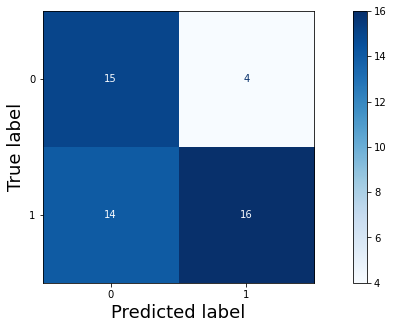

In [1225]:
preds = gridsearch_3.predict(X_test_3)

cnf = confusion_matrix(y_test_3, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf)
disp.plot(cmap=plt.cm.Blues)

We can see a very strong precision. Of 20 predicted weight loss days, we predicted 16 correctly. Let's review the leafs.

In [1226]:
DT_3 = DecisionTreeClassifier(criterion='entropy', max_depth = 4, min_samples_split = 15)
DT_3.fit(X_train_3, y_train_3)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

Let's look at the feature importance.

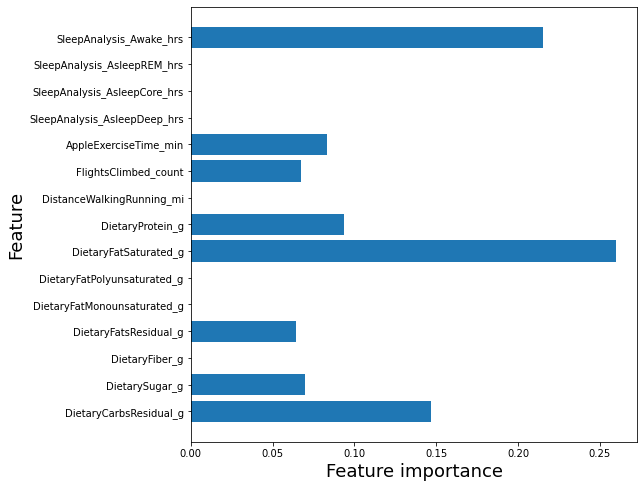

In [1227]:
def plot_feature_importances(model):
    n_features = X_train_3.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_3.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(DT_3)

We have Saturated Fat as greatest feature importance, let's look at other model for feature 2 and see results.

### 5.1.2 Review Decision Tree at Feature 2.

In [1228]:
# Split the data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(feature_2, df['weight_loss'], random_state = 42, test_size = .25)

In [1229]:
# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline_2 = Pipeline([('DT_2', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT_2__criterion': ['gini', 'entropy'],
         'DT_2__max_depth': [2, 3, 4, 5, 6],
         'DT_2__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch_2 = GridSearchCV(estimator=dt_pipeline_2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch_2.fit(X_train_2, y_train_2)
print("Best Parameters: \n{}\n".format(gridsearch_2.best_params_))

Best Parameters: 
{'DT_2__criterion': 'gini', 'DT_2__max_depth': 2, 'DT_2__min_samples_split': 5}



In [1230]:
DT_2 = DecisionTreeClassifier(criterion='gini', max_depth = 2, min_samples_split = 5)
DT_2.fit(X_train_2, y_train_2)

DecisionTreeClassifier(max_depth=2, min_samples_split=5)

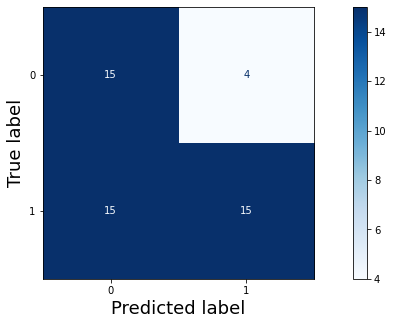

In [1231]:
preds = gridsearch_2.predict(X_test_2)

cnf = confusion_matrix(y_test_2, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf)
disp.plot(cmap=plt.cm.Blues)

So we can see that our precision went down slightly 15 out of 19 correct predictions, but only because we predicted on less. Let's look at the leafs>

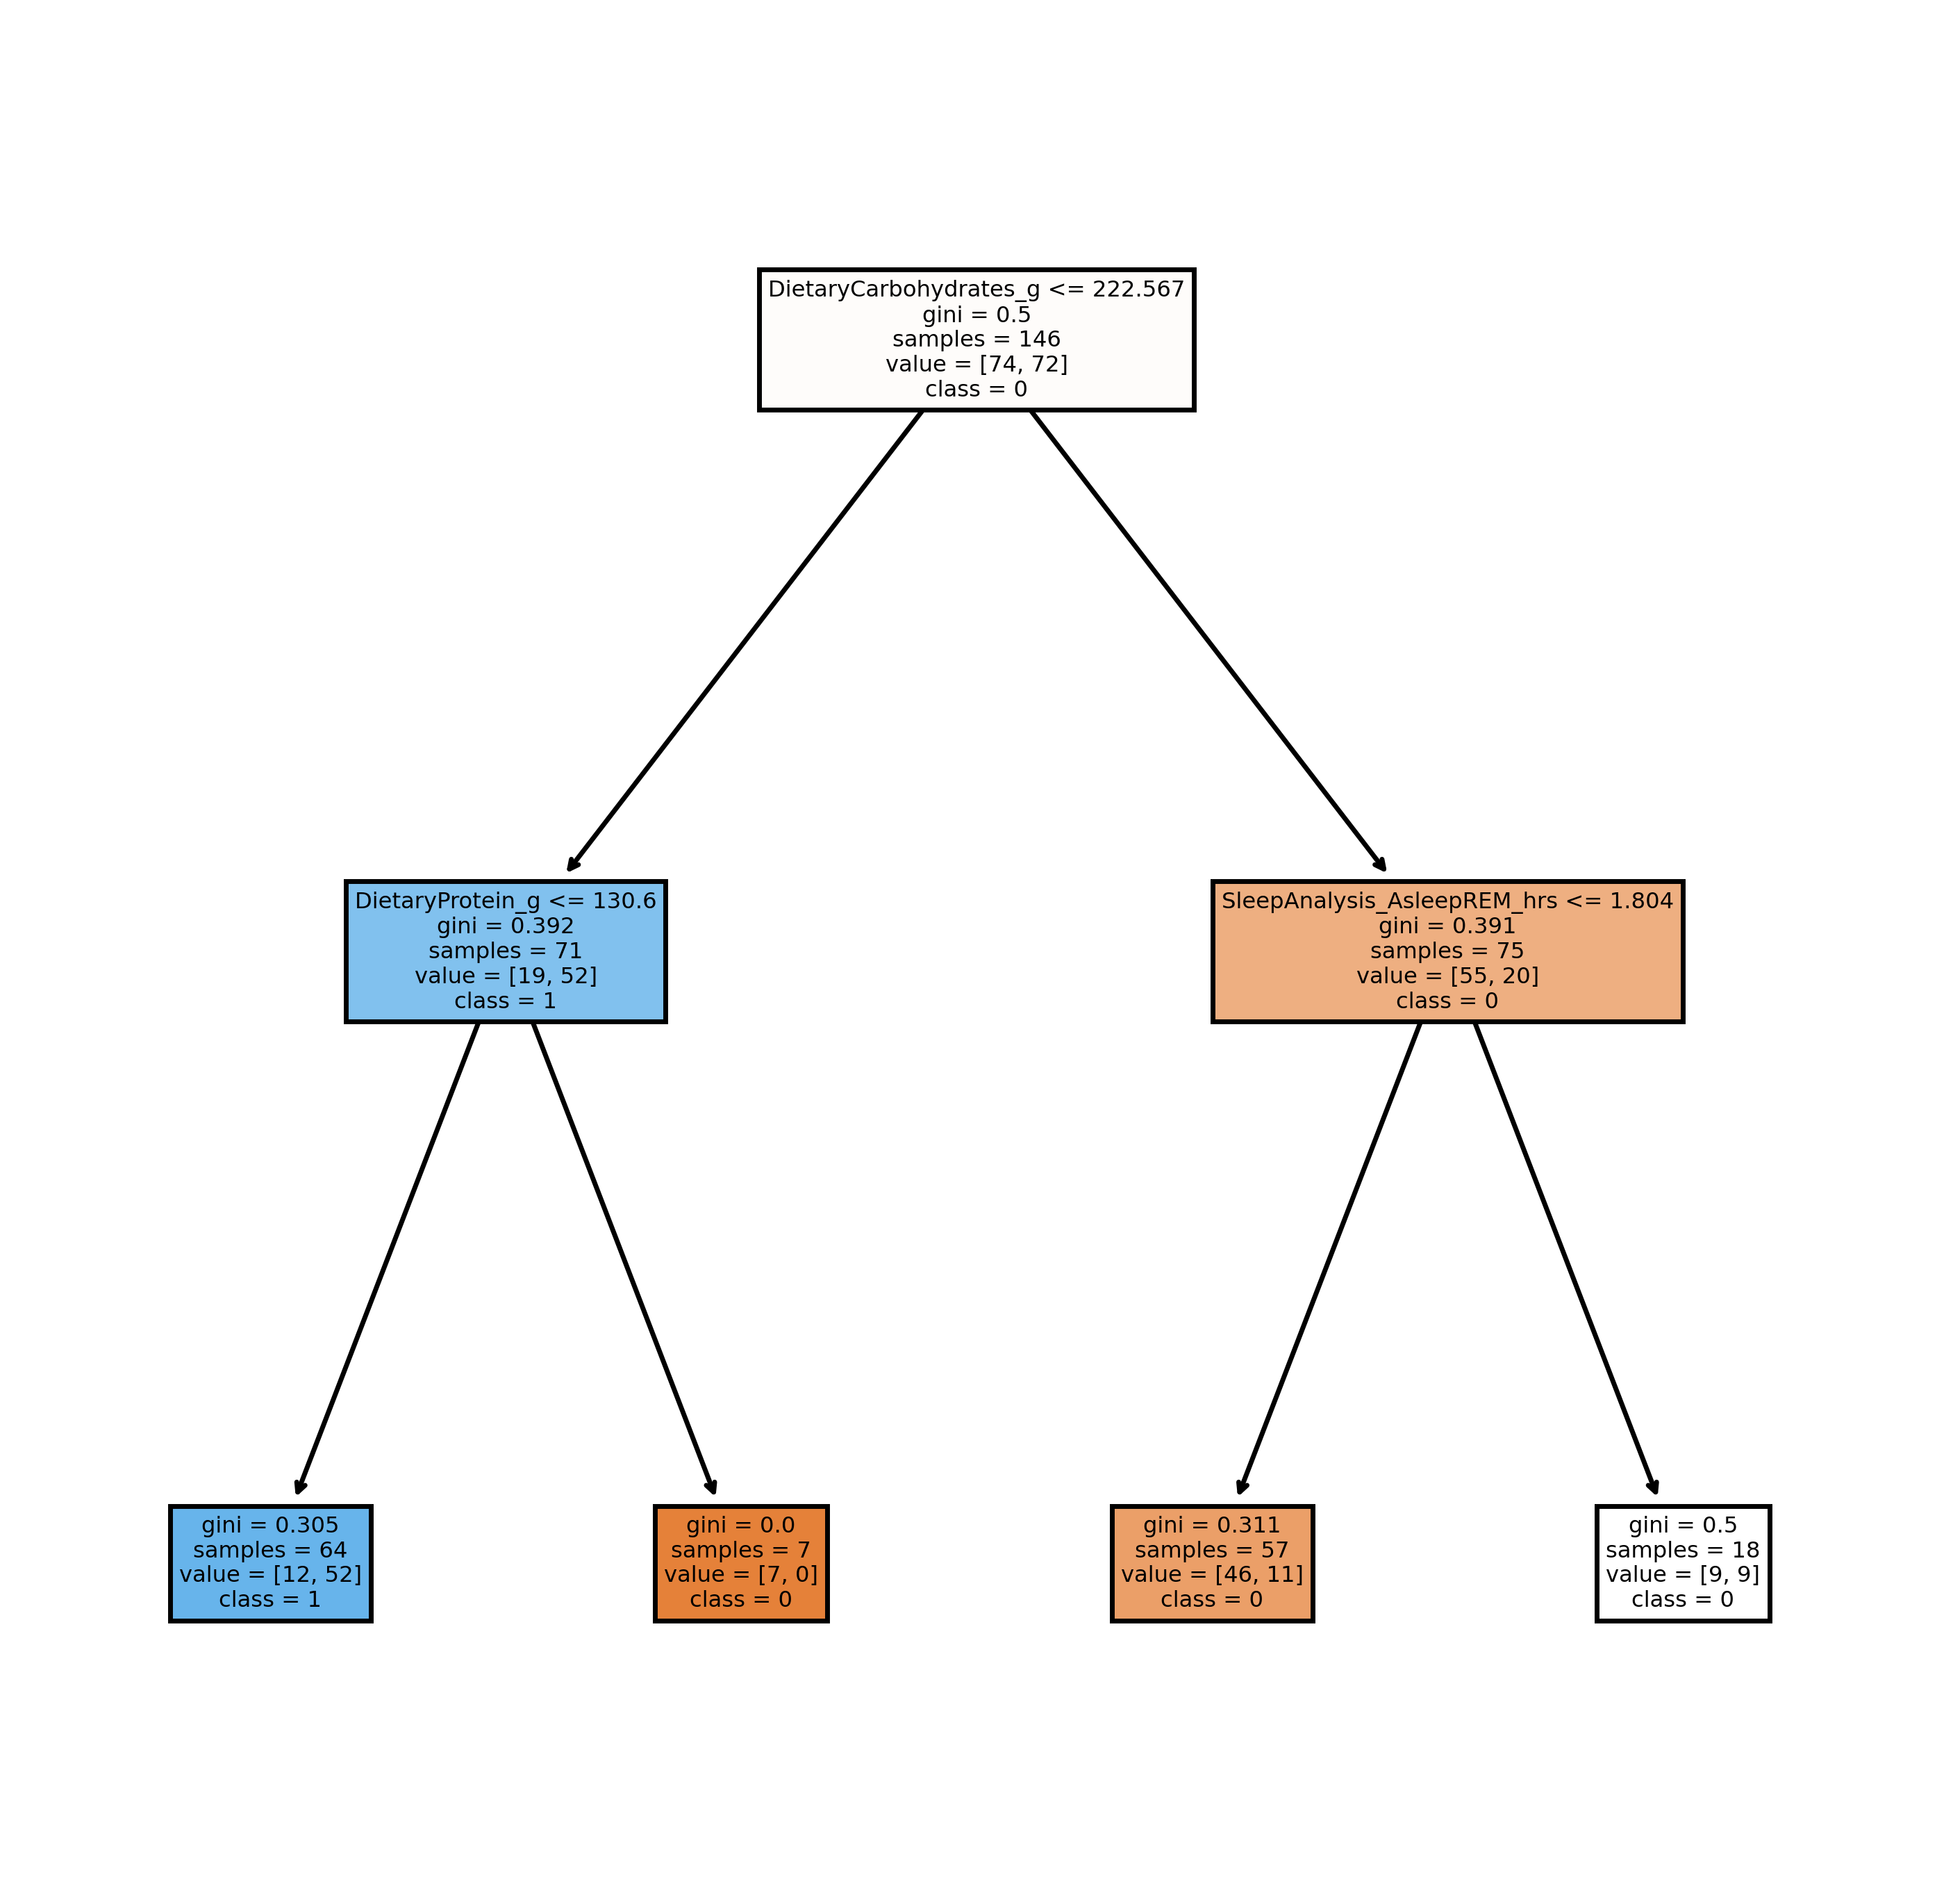

In [1232]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (7,7), dpi=500)
tree.plot_tree(DT_2,
               feature_names = X_train_2.columns, 
               class_names=np.unique(y_train_2).astype('str'),
               filled = True)
plt.show()

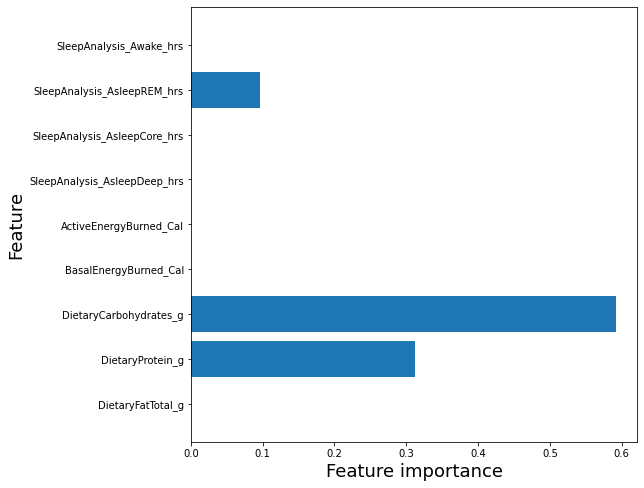

In [1233]:
def plot_feature_importances(model):
    n_features = X_train_2.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_2.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(DT_2)

THis is fascinating. In this particular model, when less Dietary Carbohydrates than 222.5 g were consumed, 73% of the days there was wieght loss the next day. When above, 73% of the next days experienced weight gains. That's regardless of any other considerations! That one factor alone is staggering.

#### RECOMMENDATION #1 - Carbs
Utilize decision tree model with Dietary Carbohydrate Split. We'll delve into this one a little deeper.

Now let's see what happens when we combined this data with our Feature 3 data.

### 5.1.2 Review Decision Tree with both Feature 2 & Feature 3.

In [1234]:
feature_2_3 = pd.concat([feature_2, df[level_3_diet_carbs], df[level_3_diet_fat]], axis=1)
feature_2_3

,DietaryFatTotal_g,DietaryProtein_g,DietaryCarbohydrates_g,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs,DietaryCarbsResidual_g,DietarySugar_g,DietaryFiber_g,DietaryFatsResidual_g,DietaryFatMonounsaturated_g,DietaryFatPolyunsaturated_g,DietaryFatSaturated_g
date,,,,,,,,,,,,,,,,
2023-08-24,159.7455,166.7683,405.4413,2055.322,564.7780,0.783333,5.558333,1.766667,0.266667,263.0599,91.6303,50.7511,102.2252,9.5,11.8,36.2203
2023-08-25,62.9275,106.1325,152.7750,2174.950,793.3800,1.008333,3.700000,1.500000,0.133333,87.4023,46.1907,19.1820,52.1110,0.0,0.0,10.8165
2023-08-26,118.3000,113.6000,219.5000,2074.476,395.3870,1.400000,3.916667,1.558333,0.050000,111.3000,93.4000,14.8000,55.5000,15.0,8.3,39.5000
2023-08-27,79.9300,125.8100,170.3400,2187.383,895.4360,0.891667,5.566667,2.591667,0.066667,87.5300,39.7900,43.0200,45.9700,2.9,3.1,27.9600
2023-08-28,70.8500,121.2500,210.4000,2186.244,901.5490,0.641667,5.275000,2.008333,0.158333,119.4100,64.5900,26.4000,42.8500,7.1,4.6,16.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,94.9000,71.3000,319.0000,2004.932,542.6680,0.700000,4.475000,1.683333,2.525000,185.8000,98.7000,34.5000,56.4000,10.7,5.6,22.2000
2024-03-02,76.2000,79.3000,225.7000,2048.925,1651.9890,0.863462,4.172222,1.510000,0.252308,128.0000,74.1000,23.6000,45.8000,3.0,2.4,25.0000
2024-03-03,59.9000,108.7000,239.3000,2048.189,1443.2150,1.108333,3.925000,1.966667,0.300000,174.8000,47.0000,17.5000,48.3000,0.6,1.3,9.7000


In [1235]:
# Split the data
X_train_2_3, X_test_2_3, y_train_2_3, y_test_2_3 = train_test_split(feature_2_3, df['weight_loss'], random_state = 42, test_size = .25)

To get a depth of response, I'm going to raise the ceiling of the max_depth. Let's see if we can get some additional information.

In [1236]:
# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline_2_3 = Pipeline([('DT_2_3', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT_2_3__criterion': ['gini', 'entropy'],
         'DT_2_3__max_depth': [3, 4, 5, 6],
         'DT_2_3__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch_2_3 = GridSearchCV(estimator=dt_pipeline_2_3, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch_2_3.fit(X_train_2_3, y_train_2_3)
print("Best Parameters: \n{}\n".format(gridsearch_2_3.best_params_))

Best Parameters: 
{'DT_2_3__criterion': 'entropy', 'DT_2_3__max_depth': 3, 'DT_2_3__min_samples_split': 10}



So... it appears that our precision went down, to 75%. Our accuracy drops slightly, but not by much. Let's look at the leafs.

In [1237]:
DT_2_3 = DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_split = 5)
DT_2_3.fit(X_train_2_3, y_train_2_3)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)

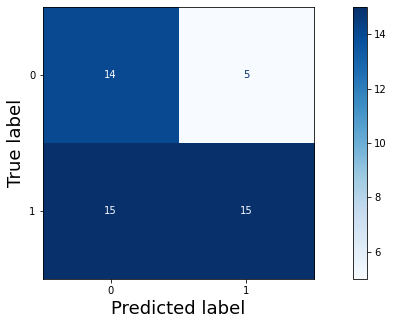

In [1238]:
preds = DT_2_3.predict(X_test_2_3)

cnf = confusion_matrix(y_test_2_3, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf)
disp.plot(cmap=plt.cm.Blues)

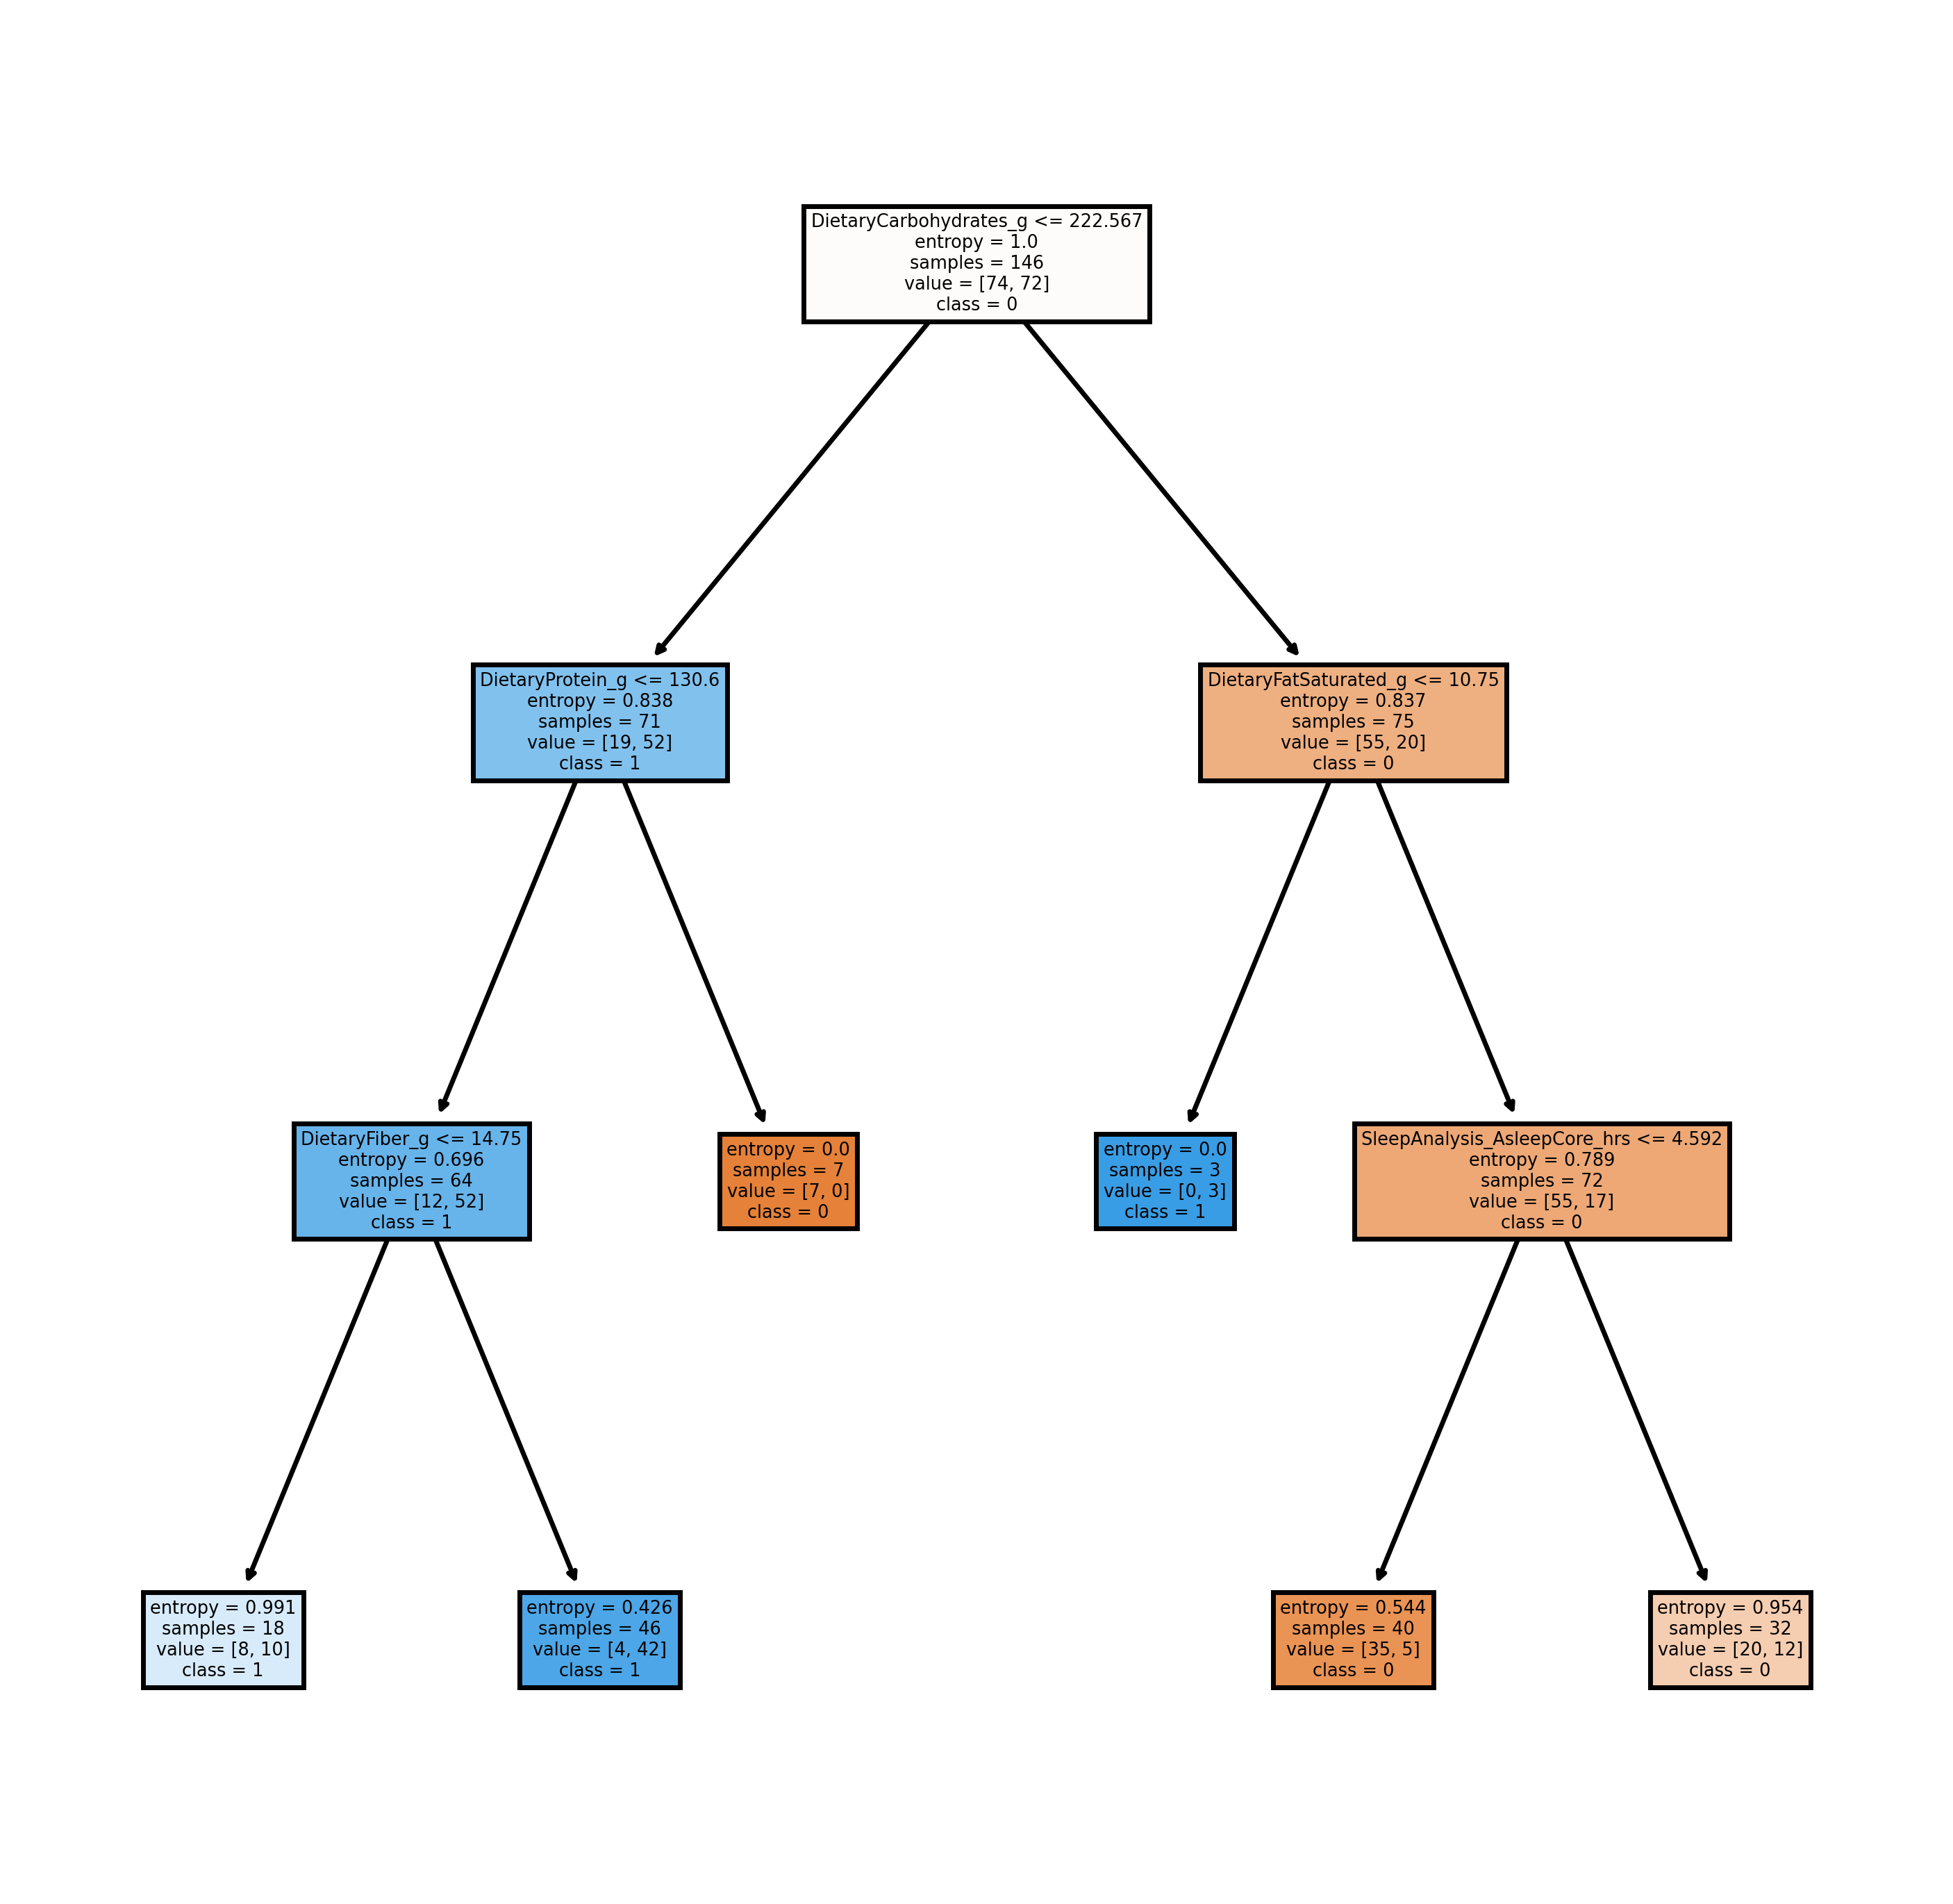

In [1239]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (7,7), dpi=500)
tree.plot_tree(DT_2_3,
               feature_names = X_train_2_3.columns, 
               class_names=np.unique(y_train_2_3).astype('str'),
               filled = True)
plt.show()

This is fascinating. It appears that the fiber we have contributes to weight loss. 

#### RECOMMENDATION #2 - Carbs & Fiber. 
In fact, days where we are under our Carb threshold, but have a minimum of 14.75 grams of Fiber, we are experience weight loss 42 out of 53 days. That's nearly 80% We'll touch on this more in the Results Section

In [1240]:
percentile_of_protein = percentileofscore(df['DietaryProtein_g'], 121)
print(percentile_of_protein)

83.58974358974359


In [1241]:
percentile_of_protein = percentileofscore(df['DietaryCarbohydrates_g'], 222.5)
print(percentile_of_protein)

47.17948717948718


As we can see, 222.5 grams of Carbohydrates is the 47% percentile. Basically the median. This thresholds splits our data nearly evenly, with fairly strong results after that.

The protein threshold is really high, and after our carbs split, only accounts for 11 samples, 8 of which are weight gains.

On the weight loss side, a lack of Core Sleep turns out to lead to certain weight loss. Let's see what the data looks like with sleep combined. 

### 5.1.4 Review Decision Tree with both Feature 2 & Feature 3, but combined Sleep.

In [1242]:
feature_sleep = pd.concat([df[level_2_diet + level_2_exer], df[level_3_diet_carbs + level_3_diet_fat + level_1_sleep]], axis=1)

In [1243]:
# Split the data
X_train_sleep, X_test_sleep, y_train_sleep, y_test_sleep = train_test_split(feature_sleep, df['weight_loss'], random_state = 42, test_size = .25)

In [1244]:
# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline_sleep = Pipeline([('DT_sleep', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT_sleep__criterion': ['gini', 'entropy'],
         'DT_sleep__max_depth': [3, 4, 5, 6],
         'DT_sleep__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch_sleep = GridSearchCV(estimator=dt_pipeline_sleep, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch_sleep.fit(X_train_sleep, y_train_sleep)
print("Best Parameters: \n{}\n".format(gridsearch_sleep.best_params_))

Best Parameters: 
{'DT_sleep__criterion': 'entropy', 'DT_sleep__max_depth': 3, 'DT_sleep__min_samples_split': 5}



In [1245]:
DT_sleep = DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_split = 5)
DT_sleep.fit(X_train_sleep, y_train_sleep)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

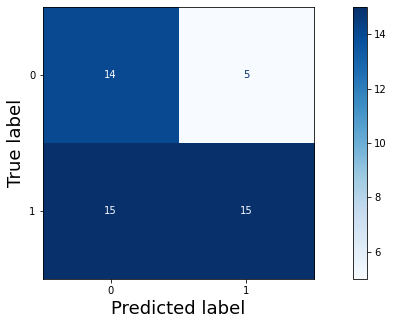

In [1246]:
preds = DT_sleep.predict(X_test_sleep)

cnf = confusion_matrix(y_test_sleep, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf)
disp.plot(cmap=plt.cm.Blues)

So, we have still sacrificed some precision. We're at 75%. This is the difference of 1 or 2 predictions. Let's look at the leafs

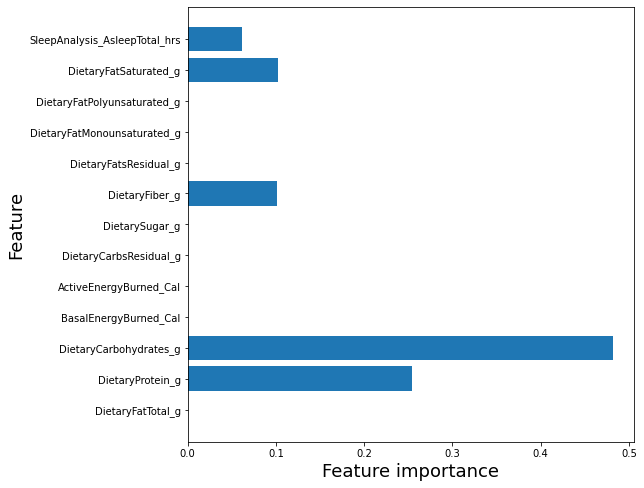

In [1247]:
def plot_feature_importances(model):
    n_features = X_train_sleep.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_sleep.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(DT_sleep)

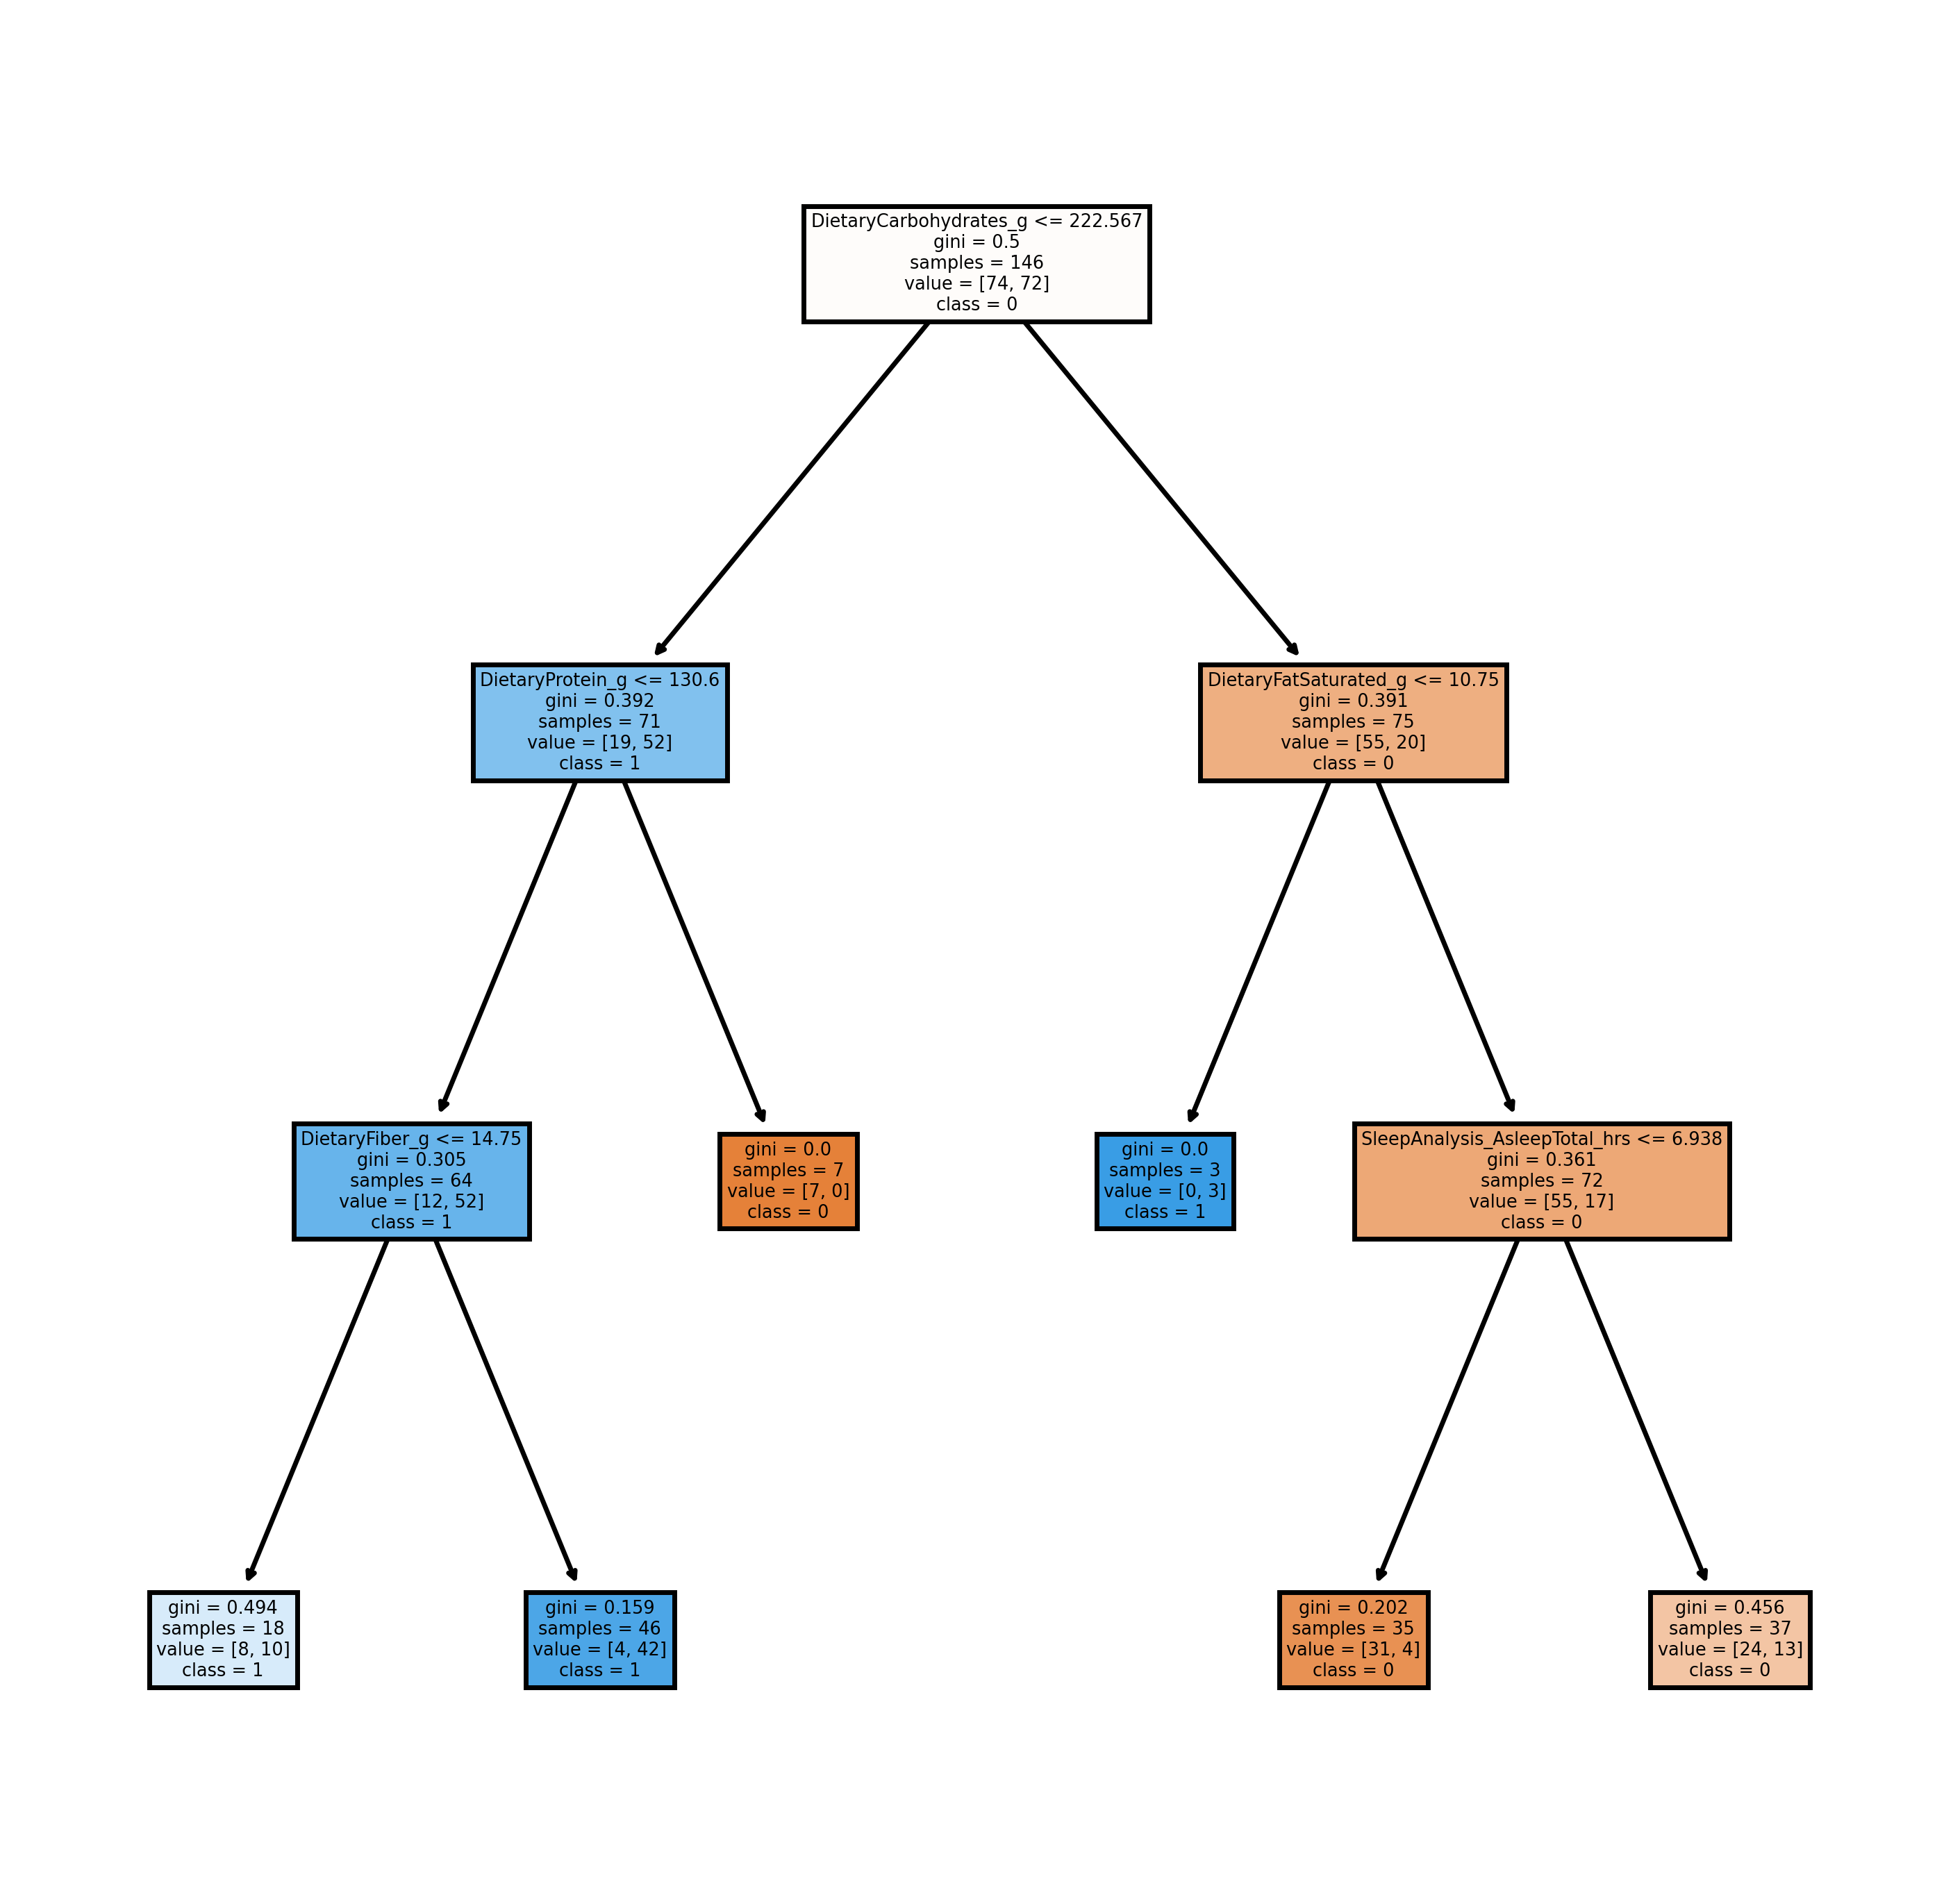

In [1248]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (7,7), dpi=500)
tree.plot_tree(DT_sleep,
               feature_names = X_train_sleep.columns, 
               class_names=np.unique(y_train_sleep).astype('str'),
               filled = True)
plt.show()

#### Recommendation #3 - Sleep, When carbs are over 121g. 
When over the Carb limit, getting less than 7 hours of sleep almost guarantees weight gain, with it occuring 31 out of 37 instances.

### 5.2 Three Recommendations - Key Findings
Based on our preliminary modeling iterations, we selected the Decision Tree model to fine tune. We reviewed a few different versions of it, but ultimately decided on a model that had a precision of 75%, which was slightly lower than the version that we tested in the previous section (80%). This is because of the findings associate with the model led to strong predictors of both weight gain and weight loss utilizing only a few key variables.  We will review them here.

### 5.2.1 The Carb Number
Best on the Decision Tree model where we account for Total Carbs, this number had a impactful effect on whether a person experience next day weight loss. To illustrate this, let's generate a few pie charts.

In [1249]:
#create multiple arrays containing the tallies of the weight loss and weight gain at the carb threshold
carb_under_loss = df[(df['DietaryCarbohydrates_g'] < 222.567) & (df['weight_loss'] == 1)]['weight_loss'].count()
carb_under_gain = df[(df['DietaryCarbohydrates_g'] < 222.567) & (df['weight_loss'] == 0)]['weight_loss'].count()
carb_over_loss = df[(df['DietaryCarbohydrates_g'] > 222.567) & (df['weight_loss'] == 1)]['weight_loss'].count()
carb_over_gain = df[(df['DietaryCarbohydrates_g'] > 222.567) & (df['weight_loss'] == 0)]['weight_loss'].count()

carb_over = [carb_over_loss, carb_over_gain]
carb_under = [carb_under_loss, carb_under_gain]

In [1250]:
carb_under

[68, 24]

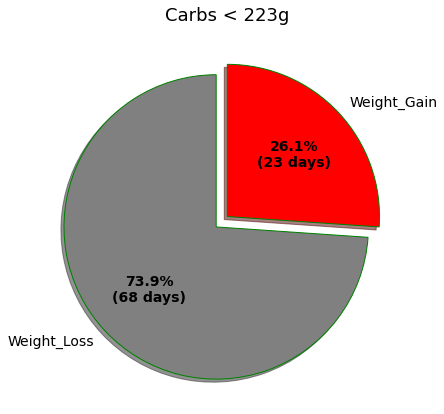

In [1251]:
# Creating explode data
explode = (0.1, 0.0)
 
# Creating color parameters
colors = ("gray", "red")
 
# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}
 
# Creating autocpt arguments
 
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} days)".format(pct, absolute)
 
 
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(carb_under,
                                  autopct=lambda pct: func(pct, carb_under),
                                  explode=explode,
                                  labels=['Weight_Loss', 'Weight_Gain'],
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="black", size=14))
 
plt.setp(autotexts, size=14, weight="bold")
ax.set_title(f'Carbs < 223g')
 
# show plot
plt.show()

As you can see, this single factor alone corresponds to experiencing next day weight loss. And it also applies for weight gain.

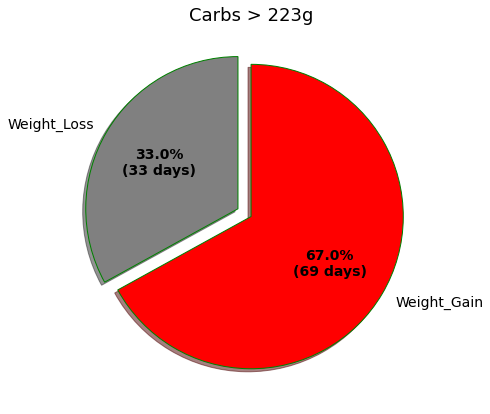

In [1252]:
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(carb_over,
                                  autopct=lambda pct: func(pct, carb_over),
                                  explode=explode,
                                  labels=['Weight_Loss', 'Weight_Gain'],
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="black", size=14))
 
plt.setp(autotexts, size=14, weight="bold")
ax.set_title(f'Carbs > 223g')
 
# show plot
plt.show()



### 5.2.1 Lack of Sleep and Weight Gain

It turns out that the lack of sleep may aid in weight gain! On days when the carb threshold was exceeded, getting less than 7 hours of sleep corresponding with nearly 80% occurrences of weight gain days. 

In [1253]:
##create multiple arrays containing the tallies of the weight loss and weight gain at the carb and sleep threshold
carb_over_sleep_loss = df[(df['DietaryCarbohydrates_g'] > 222.567) & (df['SleepAnalysis_AsleepTotal_hrs'] < 6.84) & (df['weight_loss'] == 1)]['weight_loss'].count()
carb_over_sleep_gain = df[(df['DietaryCarbohydrates_g'] > 222.567) & (df['SleepAnalysis_AsleepTotal_hrs'] < 6.84) & (df['weight_loss'] == 0)]['weight_loss'].count()
carb_over_sleep = [carb_over_sleep_loss, carb_over_sleep_gain]

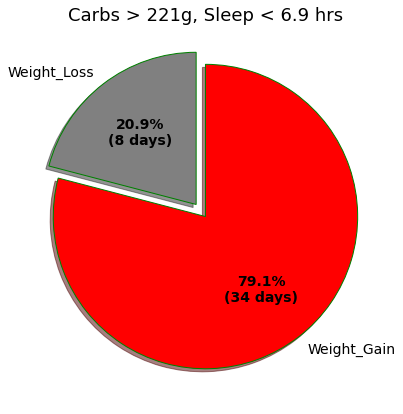

In [1254]:
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(carb_over_sleep,
                                  autopct=lambda pct: func(pct, carb_over_sleep),
                                  explode=explode,
                                  labels=['Weight_Loss', 'Weight_Gain'],
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="black", size=14))
 
plt.setp(autotexts, size=14, weight="bold")
ax.set_title(f'Carbs > 221g, Sleep < 6.9 hrs')
 
# show plot
plt.show()

### 5.2.3 Fiber and Weight Loss
Fiber may help with weight loss. On days below the carb threshold, having a minimum amount of carbs increased next weight loss occurences of up to 81.2%.

In [1255]:
carb_under_fiber_loss = df[(df['DietaryCarbohydrates_g'] < 222.567) & (df['DietaryFiber_g'] > 14.75) & (df['weight_loss'] == 1)]['weight_loss'].count()
carb_under_fiber_gain = df[(df['DietaryCarbohydrates_g'] < 222.567) & (df['DietaryFiber_g'] > 14.75) & (df['weight_loss'] == 0)]['weight_loss'].count()
carb_under_fiber = [carb_under_fiber_loss, carb_under_fiber_gain]
carb_under_fiber

[56, 13]

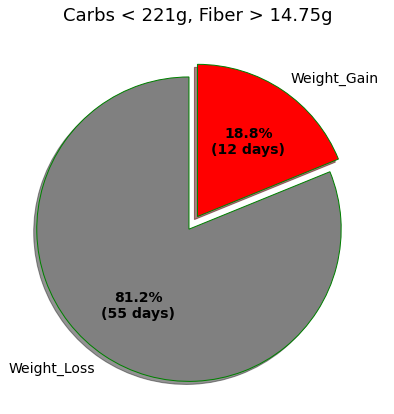

In [1256]:
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(carb_under_fiber,
                                  autopct=lambda pct: func(pct, carb_under_fiber),
                                  explode=explode,
                                  labels=['Weight_Loss', 'Weight_Gain'],
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="black", size=14))
 
plt.setp(autotexts, size=14, weight="bold")
ax.set_title(f'Carbs < 221g, Fiber > 14.75g')
 
# show plot
plt.show()

### 6 Summary
To aid in the struggle to lose weight, this model was able to analyze data and create 3 key finding that could be used to help people reach their goals. Through lifestyle analytics, a user can track their eating over the case of the day and receive notifications about how to course correct. The model utilized a database from apps and devices that was tracking the user's lifestyle analytics. There was also manual data entry to log calories and weigh-in data.

#### 6.1 Modeling
This model surveyed a number of machine learning algorithms to best predict weight loss. A Decision Tree model was utilized as it had the best performance in preliminary testing, with primary emphasis on precision, but also accuracy as a secondary metric. Once the model was selected, it was refined through feature experimentation and model tuning. The model yielded three findings that corresponding with nearly 82% occurences of weight loss, and 79% occurences of weight gain. The model that utilized these findings descreased in precision, but these was due to one additional incorrect prediction in the test data.

#### 6.2 Key Findings
#### Carbs
The strongest indicator in the model of potential weight loss. When under the carbohydrate threshold (223 g) the user experienced 74% of their weigh-ins the next day showed weight loss. Vice-Versa, when the user was over the threshold (223g), 67% of the weigh-ins next day showed a gain.

#### Lack of Sleep
Lack of sleep may contribute to weight gain. In instances when the user was over the carbohydrate threshold, and slept less than 6.9hrs, almost 80% of the weigh-ins showed a gain. That's a 12% increase.

#### Fiber
Having a minimum intake of Fiber could help with weight loss. In instances when the user was under the carbohydrate threshold, and consumed more than 15.75 grams of Fiber, almost 82% of their next day weigh-ins showed a loss. That's an 8% increase over just the carbs.

#### 6.3 Next Steps
#### Additional Data 
We need to continue to refine the model to boost performance. Typically, over 1000 observations are needed to have confidence in a model. We only had 195 observations, nearly 30% of which had gaps in weight data. With more data we can optimize the success we already have.

#### Test UI Prompts 
Recommendations for course correction are only as effective as how the message is delivered. For carb tracking, perhaps the user could monitor their carb intake through the day and receive a notification when intake is high. With Fiber, the user could be pinged at the end of the day if their fiber intake is low. When carb intake increases, the user could be reminded to get enough sleep.

#### Try Calorie Counting
Increase awareness around calorie counting. It's hard at first but then it becomes second nature. It's very helpful to track what one eats.